In [21]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter

X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")
person_train_valid = np.load("person_train_valid.npy")
X_train_valid = np.load("X_train_valid.npy")
y_train_valid = np.load("y_train_valid.npy")
person_test = np.load("person_test.npy")

y_test = y_test - 769
y_train_valid = y_train_valid - 769
print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))

Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


In [22]:
# For subject 1
X_train_valid_1 = X_train_valid[np.where(person_train_valid==0)[0]]
y_train_valid_1 = y_train_valid[np.where(person_train_valid==0)[0]]
X_test_1 = X_test[np.where(person_test==0)[0]]
y_test_1 = y_test[np.where(person_test==0)[0]]

In [23]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self,X,Y):
        self.X = torch.FloatTensor(X)
        self.Y = torch.LongTensor(Y)
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, index):
        return self.X[index],self.Y[index]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid,
                                                              test_size=0.2,shuffle=True)

train_set = Dataset(X_train,y_train)
val_set = Dataset(X_valid,y_valid)
test_set = Dataset(X_test, y_test)
print(X_train.shape)
train_loader = torch.utils.data.DataLoader(train_set,batch_size=60,shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set,batch_size=20,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set,batch_size=40,shuffle=True)

(1692, 22, 1000)


Net(
  (conv1): Conv1d(22, 40, kernel_size=(2,), stride=(2,))
  (bn1): BatchNorm1d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv1d(40, 60, kernel_size=(3,), stride=(1,))
  (bn2): BatchNorm1d(60, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv1d(60, 80, kernel_size=(3,), stride=(1,))
  (bn3): BatchNorm1d(80, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv1d(80, 100, kernel_size=(3,), stride=(1,))
  (bn4): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv1d(100, 120, kernel_size=(3,), stride=(2,))
  (bn5): BatchNorm1d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=7320, out_features=300, bias=True)
  (bn6): BatchNorm1d(300,

Epoch 7 | Iter19 | Loss1.4127 | TrainAcc0.3333 | val acc 0.3877
Epoch 7 | Iter21 | Loss1.3683 | TrainAcc0.3833 | val acc 0.3924
Epoch 7 | Iter23 | Loss1.3335 | TrainAcc0.3000 | val acc 0.3948
Epoch 7 | Iter25 | Loss1.4226 | TrainAcc0.3000 | val acc 0.4066
Epoch 7 | Iter27 | Loss1.3827 | TrainAcc0.3000 | val acc 0.3995
Epoch 8 | Iter1 | Loss1.3838 | TrainAcc0.2333 | val acc 0.3972
Epoch 8 | Iter3 | Loss1.3286 | TrainAcc0.4000 | val acc 0.4019
Epoch 8 | Iter5 | Loss1.3485 | TrainAcc0.4167 | val acc 0.4090
Epoch 8 | Iter7 | Loss1.4301 | TrainAcc0.2833 | val acc 0.4019
Epoch 8 | Iter9 | Loss1.3772 | TrainAcc0.4333 | val acc 0.4090
Epoch 8 | Iter11 | Loss1.4090 | TrainAcc0.2833 | val acc 0.4090
Epoch 8 | Iter13 | Loss1.3973 | TrainAcc0.2833 | val acc 0.4043
Epoch 8 | Iter15 | Loss1.3407 | TrainAcc0.4167 | val acc 0.4043
Epoch 8 | Iter17 | Loss1.3675 | TrainAcc0.3167 | val acc 0.4137
Epoch 8 | Iter19 | Loss1.4815 | TrainAcc0.3000 | val acc 0.4161
Epoch 8 | Iter21 | Loss1.2978 | TrainAcc0.433

Epoch 16 | Iter23 | Loss1.1503 | TrainAcc0.3667 | val acc 0.4350
Epoch 16 | Iter25 | Loss1.3080 | TrainAcc0.3667 | val acc 0.4374
Epoch 16 | Iter27 | Loss1.2704 | TrainAcc0.3833 | val acc 0.4492
Epoch 17 | Iter1 | Loss1.2671 | TrainAcc0.4500 | val acc 0.4492
Epoch 17 | Iter3 | Loss1.3518 | TrainAcc0.3000 | val acc 0.4397
Epoch 17 | Iter5 | Loss1.2628 | TrainAcc0.3833 | val acc 0.4397
Epoch 17 | Iter7 | Loss1.1728 | TrainAcc0.4333 | val acc 0.4492
Epoch 17 | Iter9 | Loss1.2314 | TrainAcc0.4000 | val acc 0.4421
Epoch 17 | Iter11 | Loss1.1531 | TrainAcc0.5000 | val acc 0.4492
Epoch 17 | Iter13 | Loss1.1903 | TrainAcc0.4333 | val acc 0.4421
Epoch 17 | Iter15 | Loss1.1896 | TrainAcc0.4833 | val acc 0.4397
Epoch 17 | Iter17 | Loss1.1624 | TrainAcc0.4667 | val acc 0.4563
Epoch 17 | Iter19 | Loss1.1290 | TrainAcc0.5167 | val acc 0.4515
Epoch 17 | Iter21 | Loss1.1720 | TrainAcc0.4333 | val acc 0.4421
Epoch 17 | Iter23 | Loss1.1556 | TrainAcc0.4500 | val acc 0.4326
Epoch 17 | Iter25 | Loss1.3175

Epoch 25 | Iter25 | Loss1.0019 | TrainAcc0.5167 | val acc 0.4823
Epoch 25 | Iter27 | Loss1.0066 | TrainAcc0.5833 | val acc 0.4846
Epoch 26 | Iter1 | Loss0.9442 | TrainAcc0.6500 | val acc 0.4728
Epoch 26 | Iter3 | Loss1.0653 | TrainAcc0.5500 | val acc 0.4752
Epoch 26 | Iter5 | Loss1.0897 | TrainAcc0.5667 | val acc 0.4728
Epoch 26 | Iter7 | Loss0.9843 | TrainAcc0.6000 | val acc 0.4894
Epoch 26 | Iter9 | Loss0.9211 | TrainAcc0.5667 | val acc 0.4846
Epoch 26 | Iter11 | Loss1.0593 | TrainAcc0.5333 | val acc 0.4846
Epoch 26 | Iter13 | Loss0.9699 | TrainAcc0.6333 | val acc 0.4799
Epoch 26 | Iter15 | Loss1.0707 | TrainAcc0.5167 | val acc 0.4752
Epoch 26 | Iter17 | Loss1.0217 | TrainAcc0.6167 | val acc 0.4846
Epoch 26 | Iter19 | Loss1.0951 | TrainAcc0.4833 | val acc 0.4704
Epoch 26 | Iter21 | Loss1.0609 | TrainAcc0.5500 | val acc 0.4752
Epoch 26 | Iter23 | Loss1.1269 | TrainAcc0.4667 | val acc 0.4799
Epoch 26 | Iter25 | Loss0.9909 | TrainAcc0.6000 | val acc 0.4775
Epoch 26 | Iter27 | Loss0.9959

Epoch 34 | Iter27 | Loss0.8728 | TrainAcc0.6333 | val acc 0.4917
Epoch 35 | Iter1 | Loss0.7726 | TrainAcc0.7833 | val acc 0.5035
Epoch 35 | Iter3 | Loss0.7906 | TrainAcc0.7333 | val acc 0.4965
Epoch 35 | Iter5 | Loss0.8497 | TrainAcc0.6167 | val acc 0.4775
Epoch 35 | Iter7 | Loss0.9616 | TrainAcc0.7000 | val acc 0.4704
Epoch 35 | Iter9 | Loss1.0093 | TrainAcc0.5333 | val acc 0.4752
Epoch 35 | Iter11 | Loss0.8497 | TrainAcc0.6500 | val acc 0.4846
Epoch 35 | Iter13 | Loss0.8924 | TrainAcc0.6167 | val acc 0.4917
Epoch 35 | Iter15 | Loss0.9297 | TrainAcc0.6167 | val acc 0.5059
Epoch 35 | Iter17 | Loss0.8347 | TrainAcc0.6667 | val acc 0.5130
Epoch 35 | Iter19 | Loss1.0074 | TrainAcc0.6167 | val acc 0.5177
Epoch 35 | Iter21 | Loss0.7880 | TrainAcc0.6667 | val acc 0.4965
Epoch 35 | Iter23 | Loss0.8226 | TrainAcc0.6667 | val acc 0.5012
Epoch 35 | Iter25 | Loss0.8631 | TrainAcc0.7167 | val acc 0.5059
Epoch 35 | Iter27 | Loss0.8011 | TrainAcc0.7167 | val acc 0.5012
Epoch 36 | Iter1 | Loss0.7764 

Epoch 0 | Iter27 | Loss0.8244 | TrainAcc0.6333 | val acc 0.4894
Epoch 1 | Iter1 | Loss0.7317 | TrainAcc0.7833 | val acc 0.4799
Epoch 1 | Iter3 | Loss0.9196 | TrainAcc0.6833 | val acc 0.4657
Epoch 1 | Iter5 | Loss0.6985 | TrainAcc0.7500 | val acc 0.4846
Epoch 1 | Iter7 | Loss0.9443 | TrainAcc0.5667 | val acc 0.4657
Epoch 1 | Iter9 | Loss0.7796 | TrainAcc0.7500 | val acc 0.4681
Epoch 1 | Iter11 | Loss0.8710 | TrainAcc0.6167 | val acc 0.4681
Epoch 1 | Iter13 | Loss0.7950 | TrainAcc0.7167 | val acc 0.4870
Epoch 1 | Iter15 | Loss0.7362 | TrainAcc0.6833 | val acc 0.4752
Epoch 1 | Iter17 | Loss0.7259 | TrainAcc0.7333 | val acc 0.4846
Epoch 1 | Iter19 | Loss0.8905 | TrainAcc0.6500 | val acc 0.5012
Epoch 1 | Iter21 | Loss0.6621 | TrainAcc0.8333 | val acc 0.4941
Epoch 1 | Iter23 | Loss0.7406 | TrainAcc0.7333 | val acc 0.5012
Epoch 1 | Iter25 | Loss0.7360 | TrainAcc0.7833 | val acc 0.4846
Epoch 1 | Iter27 | Loss0.6171 | TrainAcc0.8500 | val acc 0.4988
Epoch 2 | Iter1 | Loss0.7093 | TrainAcc0.8000

Epoch 10 | Iter5 | Loss0.5890 | TrainAcc0.7500 | val acc 0.5035
Epoch 10 | Iter7 | Loss0.5106 | TrainAcc0.8500 | val acc 0.4846
Epoch 10 | Iter9 | Loss0.5913 | TrainAcc0.8167 | val acc 0.5035
Epoch 10 | Iter11 | Loss0.5213 | TrainAcc0.7833 | val acc 0.4917
Epoch 10 | Iter13 | Loss0.5385 | TrainAcc0.8500 | val acc 0.4657
Epoch 10 | Iter15 | Loss0.4215 | TrainAcc0.8833 | val acc 0.4681
Epoch 10 | Iter17 | Loss0.5061 | TrainAcc0.8500 | val acc 0.4823
Epoch 10 | Iter19 | Loss0.4579 | TrainAcc0.8500 | val acc 0.4563
Epoch 10 | Iter21 | Loss0.5660 | TrainAcc0.8333 | val acc 0.4752
Epoch 10 | Iter23 | Loss0.4086 | TrainAcc0.8667 | val acc 0.4775
Epoch 10 | Iter25 | Loss0.5009 | TrainAcc0.8500 | val acc 0.4823
Epoch 10 | Iter27 | Loss0.5929 | TrainAcc0.8000 | val acc 0.4799
Epoch 11 | Iter1 | Loss0.5814 | TrainAcc0.7833 | val acc 0.4634
Epoch 11 | Iter3 | Loss0.5420 | TrainAcc0.8000 | val acc 0.4657
Epoch 11 | Iter5 | Loss0.4061 | TrainAcc0.9333 | val acc 0.4752
Epoch 11 | Iter7 | Loss0.5248 |

Epoch 19 | Iter7 | Loss0.3953 | TrainAcc0.8667 | val acc 0.4846
Epoch 19 | Iter9 | Loss0.3858 | TrainAcc0.9167 | val acc 0.5035
Epoch 19 | Iter11 | Loss0.4483 | TrainAcc0.8167 | val acc 0.4799
Epoch 19 | Iter13 | Loss0.3934 | TrainAcc0.8833 | val acc 0.4894
Epoch 19 | Iter15 | Loss0.4250 | TrainAcc0.8500 | val acc 0.4681
Epoch 19 | Iter17 | Loss0.4049 | TrainAcc0.8667 | val acc 0.5154
Epoch 19 | Iter19 | Loss0.4162 | TrainAcc0.8667 | val acc 0.4917
Epoch 19 | Iter21 | Loss0.2725 | TrainAcc0.9667 | val acc 0.4917
Epoch 19 | Iter23 | Loss0.3542 | TrainAcc0.8667 | val acc 0.4894
Epoch 19 | Iter25 | Loss0.3543 | TrainAcc0.9000 | val acc 0.5035
Epoch 19 | Iter27 | Loss0.4966 | TrainAcc0.8333 | val acc 0.4846
Epoch 20 | Iter1 | Loss0.5120 | TrainAcc0.7333 | val acc 0.4799
Epoch 20 | Iter3 | Loss0.4060 | TrainAcc0.8500 | val acc 0.4894
Epoch 20 | Iter5 | Loss0.4785 | TrainAcc0.7833 | val acc 0.4657
Epoch 20 | Iter7 | Loss0.4577 | TrainAcc0.8167 | val acc 0.4657
Epoch 20 | Iter9 | Loss0.4338 |

Epoch 28 | Iter9 | Loss0.2754 | TrainAcc0.8833 | val acc 0.5083
Epoch 28 | Iter11 | Loss0.3275 | TrainAcc0.9500 | val acc 0.5106
Epoch 28 | Iter13 | Loss0.3450 | TrainAcc0.8833 | val acc 0.5059
Epoch 28 | Iter15 | Loss0.2875 | TrainAcc0.9000 | val acc 0.4775
Epoch 28 | Iter17 | Loss0.2976 | TrainAcc0.9667 | val acc 0.5201
Epoch 28 | Iter19 | Loss0.3828 | TrainAcc0.8500 | val acc 0.5248
Epoch 28 | Iter21 | Loss0.2908 | TrainAcc0.9000 | val acc 0.5083
Epoch 28 | Iter23 | Loss0.2362 | TrainAcc0.8667 | val acc 0.5177
Epoch 28 | Iter25 | Loss0.2643 | TrainAcc0.9667 | val acc 0.4917
Epoch 28 | Iter27 | Loss0.3600 | TrainAcc0.9000 | val acc 0.5106
Epoch 29 | Iter1 | Loss0.2308 | TrainAcc0.9333 | val acc 0.4823
Epoch 29 | Iter3 | Loss0.4086 | TrainAcc0.8000 | val acc 0.4894
Epoch 29 | Iter5 | Loss0.3306 | TrainAcc0.8167 | val acc 0.5035
Epoch 29 | Iter7 | Loss0.2987 | TrainAcc0.9000 | val acc 0.5130
Epoch 29 | Iter9 | Loss0.4297 | TrainAcc0.8500 | val acc 0.5083
Epoch 29 | Iter11 | Loss0.3460 

Epoch 37 | Iter11 | Loss0.2968 | TrainAcc0.9333 | val acc 0.4941
Epoch 37 | Iter13 | Loss0.2783 | TrainAcc0.8500 | val acc 0.4941
Epoch 37 | Iter15 | Loss0.1876 | TrainAcc0.9333 | val acc 0.4870
Epoch 37 | Iter17 | Loss0.5836 | TrainAcc0.8500 | val acc 0.4775
Epoch 37 | Iter19 | Loss0.2899 | TrainAcc0.9333 | val acc 0.4752
Epoch 37 | Iter21 | Loss0.3287 | TrainAcc0.9000 | val acc 0.4894
Epoch 37 | Iter23 | Loss0.2886 | TrainAcc0.8500 | val acc 0.4704
Epoch 37 | Iter25 | Loss0.1858 | TrainAcc0.9333 | val acc 0.4681
Epoch 37 | Iter27 | Loss0.2919 | TrainAcc0.8667 | val acc 0.4704
Epoch 38 | Iter1 | Loss0.2430 | TrainAcc0.9333 | val acc 0.4563
Epoch 38 | Iter3 | Loss0.2697 | TrainAcc0.9000 | val acc 0.4610
Epoch 38 | Iter5 | Loss0.2150 | TrainAcc0.9167 | val acc 0.4728
Epoch 38 | Iter7 | Loss0.3400 | TrainAcc0.8833 | val acc 0.4681
Epoch 38 | Iter9 | Loss0.2211 | TrainAcc0.9000 | val acc 0.4752
Epoch 38 | Iter11 | Loss0.3385 | TrainAcc0.8500 | val acc 0.4941
Epoch 38 | Iter13 | Loss0.2155

Epoch 3 | Iter11 | Loss0.3631 | TrainAcc0.8333 | val acc 0.5106
Epoch 3 | Iter13 | Loss0.2043 | TrainAcc0.9167 | val acc 0.5248
Epoch 3 | Iter15 | Loss0.3177 | TrainAcc0.8667 | val acc 0.5012
Epoch 3 | Iter17 | Loss0.3014 | TrainAcc0.8833 | val acc 0.5201
Epoch 3 | Iter19 | Loss0.2178 | TrainAcc0.9167 | val acc 0.5177
Epoch 3 | Iter21 | Loss0.2434 | TrainAcc0.9333 | val acc 0.5201
Epoch 3 | Iter23 | Loss0.2156 | TrainAcc0.9833 | val acc 0.5319
Epoch 3 | Iter25 | Loss0.2204 | TrainAcc0.9167 | val acc 0.5106
Epoch 3 | Iter27 | Loss0.2447 | TrainAcc0.8833 | val acc 0.4965
Epoch 4 | Iter1 | Loss0.3103 | TrainAcc0.9000 | val acc 0.5035
Epoch 4 | Iter3 | Loss0.2981 | TrainAcc0.9167 | val acc 0.4988
Epoch 4 | Iter5 | Loss0.3194 | TrainAcc0.8833 | val acc 0.4775
Epoch 4 | Iter7 | Loss0.2113 | TrainAcc0.9500 | val acc 0.5059
Epoch 4 | Iter9 | Loss0.2685 | TrainAcc0.9333 | val acc 0.5012
Epoch 4 | Iter11 | Loss0.3203 | TrainAcc0.8500 | val acc 0.5154
Epoch 4 | Iter13 | Loss0.2433 | TrainAcc0.916

Epoch 12 | Iter17 | Loss0.2302 | TrainAcc0.9333 | val acc 0.4988
Epoch 12 | Iter19 | Loss0.2289 | TrainAcc0.9167 | val acc 0.5035
Epoch 12 | Iter21 | Loss0.3097 | TrainAcc0.8333 | val acc 0.5083
Epoch 12 | Iter23 | Loss0.2075 | TrainAcc0.9000 | val acc 0.5083
Epoch 12 | Iter25 | Loss0.2278 | TrainAcc0.8833 | val acc 0.4988
Epoch 12 | Iter27 | Loss0.2570 | TrainAcc0.8667 | val acc 0.5012
Epoch 13 | Iter1 | Loss0.2284 | TrainAcc0.9333 | val acc 0.4917
Epoch 13 | Iter3 | Loss0.3072 | TrainAcc0.8333 | val acc 0.5059
Epoch 13 | Iter5 | Loss0.2868 | TrainAcc0.8667 | val acc 0.5177
Epoch 13 | Iter7 | Loss0.3217 | TrainAcc0.8667 | val acc 0.5035
Epoch 13 | Iter9 | Loss0.2464 | TrainAcc0.8833 | val acc 0.5083
Epoch 13 | Iter11 | Loss0.1912 | TrainAcc0.9667 | val acc 0.4965
Epoch 13 | Iter13 | Loss0.1922 | TrainAcc0.9167 | val acc 0.4894
Epoch 13 | Iter15 | Loss0.2289 | TrainAcc0.8833 | val acc 0.4988
Epoch 13 | Iter17 | Loss0.2258 | TrainAcc0.9000 | val acc 0.5012
Epoch 13 | Iter19 | Loss0.2331

Epoch 21 | Iter19 | Loss0.2015 | TrainAcc0.9167 | val acc 0.4965
Epoch 21 | Iter21 | Loss0.2026 | TrainAcc0.9167 | val acc 0.4941
Epoch 21 | Iter23 | Loss0.3129 | TrainAcc0.8833 | val acc 0.4941
Epoch 21 | Iter25 | Loss0.1495 | TrainAcc0.9667 | val acc 0.4917
Epoch 21 | Iter27 | Loss0.2546 | TrainAcc0.8833 | val acc 0.4870
Epoch 22 | Iter1 | Loss0.2813 | TrainAcc0.8333 | val acc 0.5012
Epoch 22 | Iter3 | Loss0.2954 | TrainAcc0.8667 | val acc 0.4752
Epoch 22 | Iter5 | Loss0.2548 | TrainAcc0.8833 | val acc 0.4846
Epoch 22 | Iter7 | Loss0.2468 | TrainAcc0.9167 | val acc 0.4870
Epoch 22 | Iter9 | Loss0.1292 | TrainAcc0.9667 | val acc 0.4586
Epoch 22 | Iter11 | Loss0.2974 | TrainAcc0.8833 | val acc 0.4704
Epoch 22 | Iter13 | Loss0.1551 | TrainAcc0.9500 | val acc 0.4752
Epoch 22 | Iter15 | Loss0.2083 | TrainAcc0.9000 | val acc 0.4515
Epoch 22 | Iter17 | Loss0.3285 | TrainAcc0.9000 | val acc 0.4704
Epoch 22 | Iter19 | Loss0.2016 | TrainAcc0.9500 | val acc 0.4988
Epoch 22 | Iter21 | Loss0.1812

Epoch 30 | Iter21 | Loss0.2537 | TrainAcc0.8500 | val acc 0.5083
Epoch 30 | Iter23 | Loss0.2749 | TrainAcc0.9000 | val acc 0.5012
Epoch 30 | Iter25 | Loss0.3135 | TrainAcc0.8667 | val acc 0.4894
Epoch 30 | Iter27 | Loss0.2368 | TrainAcc0.9167 | val acc 0.4917
Epoch 31 | Iter1 | Loss0.2355 | TrainAcc0.8833 | val acc 0.4752
Epoch 31 | Iter3 | Loss0.2711 | TrainAcc0.9000 | val acc 0.4846
Epoch 31 | Iter5 | Loss0.2540 | TrainAcc0.9000 | val acc 0.4657
Epoch 31 | Iter7 | Loss0.2299 | TrainAcc0.8833 | val acc 0.4704
Epoch 31 | Iter9 | Loss0.2982 | TrainAcc0.8500 | val acc 0.4799
Epoch 31 | Iter11 | Loss0.2102 | TrainAcc0.9000 | val acc 0.4941
Epoch 31 | Iter13 | Loss0.2107 | TrainAcc0.9167 | val acc 0.4846
Epoch 31 | Iter15 | Loss0.1806 | TrainAcc0.9000 | val acc 0.4752
Epoch 31 | Iter17 | Loss0.2133 | TrainAcc0.9167 | val acc 0.4846
Epoch 31 | Iter19 | Loss0.3253 | TrainAcc0.8500 | val acc 0.4823
Epoch 31 | Iter21 | Loss0.1666 | TrainAcc0.9333 | val acc 0.4515
Epoch 31 | Iter23 | Loss0.3812

Epoch 39 | Iter23 | Loss0.2386 | TrainAcc0.9000 | val acc 0.4894
Epoch 39 | Iter25 | Loss0.2383 | TrainAcc0.9333 | val acc 0.4988
Epoch 39 | Iter27 | Loss0.1546 | TrainAcc0.9333 | val acc 0.4988
Epoch 40 | Iter1 | Loss0.2557 | TrainAcc0.9000 | val acc 0.4988
Epoch 40 | Iter3 | Loss0.1820 | TrainAcc0.9000 | val acc 0.4823
Epoch 40 | Iter5 | Loss0.1743 | TrainAcc0.9000 | val acc 0.4799
Epoch 40 | Iter7 | Loss0.1525 | TrainAcc0.9500 | val acc 0.4846
Epoch 40 | Iter9 | Loss0.1576 | TrainAcc0.9167 | val acc 0.4657
Epoch 40 | Iter11 | Loss0.2821 | TrainAcc0.8667 | val acc 0.4752
Epoch 40 | Iter13 | Loss0.1421 | TrainAcc0.9333 | val acc 0.4917
Epoch 40 | Iter15 | Loss0.2126 | TrainAcc0.8833 | val acc 0.4846
Epoch 40 | Iter17 | Loss0.1528 | TrainAcc0.9333 | val acc 0.4870
Epoch 40 | Iter19 | Loss0.2555 | TrainAcc0.8833 | val acc 0.4894
Epoch 40 | Iter21 | Loss0.2056 | TrainAcc0.9333 | val acc 0.4870
Epoch 40 | Iter23 | Loss0.2901 | TrainAcc0.8667 | val acc 0.4965
Epoch 40 | Iter25 | Loss0.1852

Epoch 5 | Iter25 | Loss0.2376 | TrainAcc0.9167 | val acc 0.4870
Epoch 5 | Iter27 | Loss0.2564 | TrainAcc0.8833 | val acc 0.4988
Epoch 6 | Iter1 | Loss0.2340 | TrainAcc0.9000 | val acc 0.4941
Epoch 6 | Iter3 | Loss0.3066 | TrainAcc0.8000 | val acc 0.4823
Epoch 6 | Iter5 | Loss0.2263 | TrainAcc0.9000 | val acc 0.4965
Epoch 6 | Iter7 | Loss0.2075 | TrainAcc0.9000 | val acc 0.4988
Epoch 6 | Iter9 | Loss0.3390 | TrainAcc0.8667 | val acc 0.4775
Epoch 6 | Iter11 | Loss0.2114 | TrainAcc0.9000 | val acc 0.4681
Epoch 6 | Iter13 | Loss0.1908 | TrainAcc0.9000 | val acc 0.4846
Epoch 6 | Iter15 | Loss0.2336 | TrainAcc0.8833 | val acc 0.5012
Epoch 6 | Iter17 | Loss0.4136 | TrainAcc0.8500 | val acc 0.5012
Epoch 6 | Iter19 | Loss0.1729 | TrainAcc0.9333 | val acc 0.4917
Epoch 6 | Iter21 | Loss0.1513 | TrainAcc0.9333 | val acc 0.4846
Epoch 6 | Iter23 | Loss0.1672 | TrainAcc0.9167 | val acc 0.4752
Epoch 6 | Iter25 | Loss0.3313 | TrainAcc0.8667 | val acc 0.4846
Epoch 6 | Iter27 | Loss0.2338 | TrainAcc0.883

Epoch 15 | Iter1 | Loss0.0817 | TrainAcc0.9833 | val acc 0.4823
Epoch 15 | Iter3 | Loss0.2006 | TrainAcc0.8833 | val acc 0.4894
Epoch 15 | Iter5 | Loss0.2734 | TrainAcc0.8667 | val acc 0.4799
Epoch 15 | Iter7 | Loss0.1677 | TrainAcc0.9167 | val acc 0.4894
Epoch 15 | Iter9 | Loss0.4555 | TrainAcc0.8500 | val acc 0.4846
Epoch 15 | Iter11 | Loss0.1765 | TrainAcc0.9000 | val acc 0.4870
Epoch 15 | Iter13 | Loss0.2971 | TrainAcc0.8500 | val acc 0.4870
Epoch 15 | Iter15 | Loss0.2091 | TrainAcc0.9000 | val acc 0.4846
Epoch 15 | Iter17 | Loss0.1253 | TrainAcc0.9333 | val acc 0.4894
Epoch 15 | Iter19 | Loss0.2472 | TrainAcc0.8667 | val acc 0.4941
Epoch 15 | Iter21 | Loss0.2167 | TrainAcc0.9167 | val acc 0.5012
Epoch 15 | Iter23 | Loss0.2965 | TrainAcc0.8500 | val acc 0.5106
Epoch 15 | Iter25 | Loss0.2800 | TrainAcc0.9000 | val acc 0.4988
Epoch 15 | Iter27 | Loss0.1546 | TrainAcc0.9500 | val acc 0.5035
Epoch 16 | Iter1 | Loss0.2584 | TrainAcc0.9167 | val acc 0.4728
Epoch 16 | Iter3 | Loss0.3321 |

Epoch 24 | Iter3 | Loss0.2304 | TrainAcc0.9000 | val acc 0.5059
Epoch 24 | Iter5 | Loss0.2193 | TrainAcc0.8667 | val acc 0.4894
Epoch 24 | Iter7 | Loss0.1933 | TrainAcc0.9000 | val acc 0.4799
Epoch 24 | Iter9 | Loss0.1986 | TrainAcc0.9000 | val acc 0.4823
Epoch 24 | Iter11 | Loss0.1518 | TrainAcc0.9333 | val acc 0.4846
Epoch 24 | Iter13 | Loss0.1971 | TrainAcc0.9333 | val acc 0.4917
Epoch 24 | Iter15 | Loss0.1140 | TrainAcc0.9667 | val acc 0.4870
Epoch 24 | Iter17 | Loss0.2298 | TrainAcc0.9000 | val acc 0.4657
Epoch 24 | Iter19 | Loss0.2137 | TrainAcc0.9000 | val acc 0.4917
Epoch 24 | Iter21 | Loss0.1649 | TrainAcc0.9000 | val acc 0.4988
Epoch 24 | Iter23 | Loss0.1059 | TrainAcc0.9500 | val acc 0.4799
Epoch 24 | Iter25 | Loss0.1737 | TrainAcc0.9167 | val acc 0.4870
Epoch 24 | Iter27 | Loss0.1807 | TrainAcc0.9667 | val acc 0.4846
Epoch 25 | Iter1 | Loss0.2445 | TrainAcc0.8667 | val acc 0.4988
Epoch 25 | Iter3 | Loss0.1223 | TrainAcc0.9333 | val acc 0.5083
Epoch 25 | Iter5 | Loss0.1444 |

Epoch 33 | Iter5 | Loss0.2120 | TrainAcc0.8833 | val acc 0.4870
Epoch 33 | Iter7 | Loss0.2257 | TrainAcc0.9000 | val acc 0.4846
Epoch 33 | Iter9 | Loss0.1773 | TrainAcc0.9500 | val acc 0.4894
Epoch 33 | Iter11 | Loss0.2400 | TrainAcc0.9500 | val acc 0.5012
Epoch 33 | Iter13 | Loss0.1001 | TrainAcc0.9667 | val acc 0.4917
Epoch 33 | Iter15 | Loss0.1566 | TrainAcc0.9167 | val acc 0.4988
Epoch 33 | Iter17 | Loss0.1799 | TrainAcc0.9167 | val acc 0.5012
Epoch 33 | Iter19 | Loss0.1542 | TrainAcc0.9333 | val acc 0.4965
Epoch 33 | Iter21 | Loss0.1221 | TrainAcc0.9500 | val acc 0.4988
Epoch 33 | Iter23 | Loss0.1702 | TrainAcc0.9667 | val acc 0.5035
Epoch 33 | Iter25 | Loss0.4043 | TrainAcc0.9000 | val acc 0.5106
Epoch 33 | Iter27 | Loss0.1808 | TrainAcc0.8833 | val acc 0.4846
Epoch 34 | Iter1 | Loss0.3132 | TrainAcc0.9000 | val acc 0.4917
Epoch 34 | Iter3 | Loss0.2284 | TrainAcc0.9000 | val acc 0.5012
Epoch 34 | Iter5 | Loss0.3112 | TrainAcc0.8333 | val acc 0.4775
Epoch 34 | Iter7 | Loss0.2185 |

Epoch 42 | Iter7 | Loss0.1243 | TrainAcc0.9667 | val acc 0.5059
Epoch 42 | Iter9 | Loss0.1269 | TrainAcc0.9333 | val acc 0.4965
Epoch 42 | Iter11 | Loss0.2091 | TrainAcc0.9000 | val acc 0.5130
Epoch 42 | Iter13 | Loss0.1828 | TrainAcc0.9167 | val acc 0.5130
Epoch 42 | Iter15 | Loss0.1466 | TrainAcc0.9500 | val acc 0.5083
Epoch 42 | Iter17 | Loss0.2041 | TrainAcc0.9000 | val acc 0.5130
Epoch 42 | Iter19 | Loss0.0635 | TrainAcc0.9667 | val acc 0.5059
Epoch 42 | Iter21 | Loss0.2033 | TrainAcc0.9500 | val acc 0.5106
Epoch 42 | Iter23 | Loss0.2639 | TrainAcc0.9500 | val acc 0.4988
Epoch 42 | Iter25 | Loss0.3124 | TrainAcc0.8500 | val acc 0.5130
Epoch 42 | Iter27 | Loss0.1489 | TrainAcc0.9333 | val acc 0.5106
Test accuracy is:  0.5056433408577878
lr is  0.0005 ------------------------------------------
Epoch 0 | Iter1 | Loss0.2613 | TrainAcc0.9333 | val acc 0.3191
Epoch 0 | Iter3 | Loss1.8574 | TrainAcc0.6333 | val acc 0.3853
Epoch 0 | Iter5 | Loss1.5130 | TrainAcc0.7000 | val acc 0.3830
Epo

Epoch 8 | Iter11 | Loss0.2205 | TrainAcc0.9000 | val acc 0.4894
Epoch 8 | Iter13 | Loss0.1586 | TrainAcc0.9333 | val acc 0.4775
Epoch 8 | Iter15 | Loss0.3102 | TrainAcc0.8833 | val acc 0.4775
Epoch 8 | Iter17 | Loss0.2252 | TrainAcc0.9167 | val acc 0.4799
Epoch 8 | Iter19 | Loss0.2396 | TrainAcc0.9000 | val acc 0.4894
Epoch 8 | Iter21 | Loss0.2807 | TrainAcc0.8833 | val acc 0.4846
Epoch 8 | Iter23 | Loss0.0835 | TrainAcc0.9500 | val acc 0.4870
Epoch 8 | Iter25 | Loss0.1886 | TrainAcc0.9167 | val acc 0.4870
Epoch 8 | Iter27 | Loss0.2359 | TrainAcc0.9000 | val acc 0.4846
Epoch 9 | Iter1 | Loss0.1713 | TrainAcc0.9333 | val acc 0.4870
Epoch 9 | Iter3 | Loss0.3092 | TrainAcc0.8833 | val acc 0.4728
Epoch 9 | Iter5 | Loss0.2277 | TrainAcc0.9000 | val acc 0.4728
Epoch 9 | Iter7 | Loss0.2954 | TrainAcc0.8333 | val acc 0.4823
Epoch 9 | Iter9 | Loss0.2036 | TrainAcc0.9167 | val acc 0.4823
Epoch 9 | Iter11 | Loss0.0810 | TrainAcc0.9833 | val acc 0.4894
Epoch 9 | Iter13 | Loss0.1556 | TrainAcc0.966

Epoch 17 | Iter15 | Loss0.2234 | TrainAcc0.9167 | val acc 0.4965
Epoch 17 | Iter17 | Loss0.2102 | TrainAcc0.8667 | val acc 0.4870
Epoch 17 | Iter19 | Loss0.1257 | TrainAcc0.9500 | val acc 0.4917
Epoch 17 | Iter21 | Loss0.0794 | TrainAcc0.9667 | val acc 0.4941
Epoch 17 | Iter23 | Loss0.1948 | TrainAcc0.9333 | val acc 0.4988
Epoch 17 | Iter25 | Loss0.1133 | TrainAcc0.9667 | val acc 0.4965
Epoch 17 | Iter27 | Loss0.1596 | TrainAcc0.9333 | val acc 0.4799
Epoch 18 | Iter1 | Loss0.2018 | TrainAcc0.9500 | val acc 0.4232
Epoch 18 | Iter3 | Loss0.3903 | TrainAcc0.8667 | val acc 0.3901
Epoch 18 | Iter5 | Loss0.3661 | TrainAcc0.8333 | val acc 0.4208
Epoch 18 | Iter7 | Loss0.2888 | TrainAcc0.9167 | val acc 0.4563
Epoch 18 | Iter9 | Loss0.3461 | TrainAcc0.8667 | val acc 0.4586
Epoch 18 | Iter11 | Loss0.2632 | TrainAcc0.8667 | val acc 0.4775
Epoch 18 | Iter13 | Loss0.1902 | TrainAcc0.9500 | val acc 0.4704
Epoch 18 | Iter15 | Loss0.1574 | TrainAcc0.9333 | val acc 0.4823
Epoch 18 | Iter17 | Loss0.2669

Epoch 26 | Iter17 | Loss0.4661 | TrainAcc0.8167 | val acc 0.4894
Epoch 26 | Iter19 | Loss0.6378 | TrainAcc0.9000 | val acc 0.5035
Epoch 26 | Iter21 | Loss0.1037 | TrainAcc0.9667 | val acc 0.4965
Epoch 26 | Iter23 | Loss0.1979 | TrainAcc0.9167 | val acc 0.4965
Epoch 26 | Iter25 | Loss0.3006 | TrainAcc0.8500 | val acc 0.5106
Epoch 26 | Iter27 | Loss0.1247 | TrainAcc0.9833 | val acc 0.5012
Epoch 27 | Iter1 | Loss0.1852 | TrainAcc0.9167 | val acc 0.5059
Epoch 27 | Iter3 | Loss0.1680 | TrainAcc0.9000 | val acc 0.4894
Epoch 27 | Iter5 | Loss0.2808 | TrainAcc0.8833 | val acc 0.4870
Epoch 27 | Iter7 | Loss0.2610 | TrainAcc0.9000 | val acc 0.4894
Epoch 27 | Iter9 | Loss0.1990 | TrainAcc0.9333 | val acc 0.5012
Epoch 27 | Iter11 | Loss0.2179 | TrainAcc0.9000 | val acc 0.5106
Epoch 27 | Iter13 | Loss0.1856 | TrainAcc0.8833 | val acc 0.5106
Epoch 27 | Iter15 | Loss0.1414 | TrainAcc0.9000 | val acc 0.5083
Epoch 27 | Iter17 | Loss0.2247 | TrainAcc0.8667 | val acc 0.5035
Epoch 27 | Iter19 | Loss0.1637

Epoch 35 | Iter19 | Loss0.1981 | TrainAcc0.8667 | val acc 0.5201
Epoch 35 | Iter21 | Loss0.2154 | TrainAcc0.9167 | val acc 0.5201
Epoch 35 | Iter23 | Loss0.1207 | TrainAcc0.9667 | val acc 0.5106
Epoch 35 | Iter25 | Loss0.2366 | TrainAcc0.9333 | val acc 0.5154
Epoch 35 | Iter27 | Loss0.1675 | TrainAcc0.9167 | val acc 0.5177
Epoch 36 | Iter1 | Loss0.1180 | TrainAcc0.9333 | val acc 0.5154
Epoch 36 | Iter3 | Loss0.2213 | TrainAcc0.8833 | val acc 0.5106
Epoch 36 | Iter5 | Loss0.2139 | TrainAcc0.8833 | val acc 0.5130
Epoch 36 | Iter7 | Loss0.0953 | TrainAcc0.9667 | val acc 0.5154
Epoch 36 | Iter9 | Loss0.1976 | TrainAcc0.8833 | val acc 0.5130
Epoch 36 | Iter11 | Loss0.1942 | TrainAcc0.9500 | val acc 0.5154
Epoch 36 | Iter13 | Loss0.1208 | TrainAcc0.9333 | val acc 0.5177
Epoch 36 | Iter15 | Loss0.2096 | TrainAcc0.9167 | val acc 0.5225
Epoch 36 | Iter17 | Loss0.1527 | TrainAcc0.9167 | val acc 0.5225
Epoch 36 | Iter19 | Loss0.1806 | TrainAcc0.9333 | val acc 0.5201
Epoch 36 | Iter21 | Loss0.2075

Epoch 1 | Iter19 | Loss0.6227 | TrainAcc0.8500 | val acc 0.4657
Epoch 1 | Iter21 | Loss0.5932 | TrainAcc0.8333 | val acc 0.4374
Epoch 1 | Iter23 | Loss0.2254 | TrainAcc0.8833 | val acc 0.4657
Epoch 1 | Iter25 | Loss0.3103 | TrainAcc0.8833 | val acc 0.4704
Epoch 1 | Iter27 | Loss0.5010 | TrainAcc0.8333 | val acc 0.4846
Epoch 2 | Iter1 | Loss0.3243 | TrainAcc0.8167 | val acc 0.4657
Epoch 2 | Iter3 | Loss0.4924 | TrainAcc0.8000 | val acc 0.4752
Epoch 2 | Iter5 | Loss0.3206 | TrainAcc0.8333 | val acc 0.4586
Epoch 2 | Iter7 | Loss0.2017 | TrainAcc0.9167 | val acc 0.4894
Epoch 2 | Iter9 | Loss0.3456 | TrainAcc0.8667 | val acc 0.4988
Epoch 2 | Iter11 | Loss0.1480 | TrainAcc0.9667 | val acc 0.5083
Epoch 2 | Iter13 | Loss0.4107 | TrainAcc0.8500 | val acc 0.5248
Epoch 2 | Iter15 | Loss0.9054 | TrainAcc0.8667 | val acc 0.4775
Epoch 2 | Iter17 | Loss0.2475 | TrainAcc0.8833 | val acc 0.4988
Epoch 2 | Iter19 | Loss0.3074 | TrainAcc0.8667 | val acc 0.5177
Epoch 2 | Iter21 | Loss0.3234 | TrainAcc0.883

Epoch 10 | Iter25 | Loss0.1330 | TrainAcc0.9833 | val acc 0.4728
Epoch 10 | Iter27 | Loss0.1823 | TrainAcc0.8667 | val acc 0.4634
Epoch 11 | Iter1 | Loss0.2433 | TrainAcc0.9333 | val acc 0.4894
Epoch 11 | Iter3 | Loss0.2111 | TrainAcc0.8833 | val acc 0.4799
Epoch 11 | Iter5 | Loss0.2335 | TrainAcc0.9000 | val acc 0.4823
Epoch 11 | Iter7 | Loss0.2947 | TrainAcc0.8333 | val acc 0.4823
Epoch 11 | Iter9 | Loss0.1332 | TrainAcc0.9500 | val acc 0.4775
Epoch 11 | Iter11 | Loss0.2271 | TrainAcc0.9000 | val acc 0.4870
Epoch 11 | Iter13 | Loss0.1996 | TrainAcc0.8500 | val acc 0.4941
Epoch 11 | Iter15 | Loss0.0931 | TrainAcc0.9667 | val acc 0.4988
Epoch 11 | Iter17 | Loss0.2249 | TrainAcc0.9000 | val acc 0.4823
Epoch 11 | Iter19 | Loss0.1298 | TrainAcc0.9667 | val acc 0.4681
Epoch 11 | Iter21 | Loss0.1680 | TrainAcc0.8833 | val acc 0.4870
Epoch 11 | Iter23 | Loss0.1662 | TrainAcc0.9500 | val acc 0.4799
Epoch 11 | Iter25 | Loss0.1751 | TrainAcc0.9333 | val acc 0.4752
Epoch 11 | Iter27 | Loss0.1729

Epoch 19 | Iter27 | Loss0.2104 | TrainAcc0.8667 | val acc 0.4988
Epoch 20 | Iter1 | Loss0.2302 | TrainAcc0.8667 | val acc 0.4917
Epoch 20 | Iter3 | Loss0.1457 | TrainAcc0.9500 | val acc 0.4941
Epoch 20 | Iter5 | Loss0.3352 | TrainAcc0.8000 | val acc 0.4917
Epoch 20 | Iter7 | Loss0.2331 | TrainAcc0.8833 | val acc 0.4941
Epoch 20 | Iter9 | Loss0.1761 | TrainAcc0.9167 | val acc 0.4988
Epoch 20 | Iter11 | Loss0.1953 | TrainAcc0.9500 | val acc 0.4917
Epoch 20 | Iter13 | Loss0.2895 | TrainAcc0.8833 | val acc 0.4775
Epoch 20 | Iter15 | Loss0.1568 | TrainAcc0.9500 | val acc 0.4799
Epoch 20 | Iter17 | Loss0.0839 | TrainAcc0.9667 | val acc 0.4823
Epoch 20 | Iter19 | Loss0.2496 | TrainAcc0.8667 | val acc 0.4870
Epoch 20 | Iter21 | Loss0.2010 | TrainAcc0.9167 | val acc 0.4775
Epoch 20 | Iter23 | Loss0.2596 | TrainAcc0.8833 | val acc 0.4799
Epoch 20 | Iter25 | Loss0.1057 | TrainAcc0.9667 | val acc 0.4799
Epoch 20 | Iter27 | Loss0.1775 | TrainAcc0.9167 | val acc 0.4894
Epoch 21 | Iter1 | Loss1.3545 

Epoch 29 | Iter1 | Loss0.1655 | TrainAcc0.9167 | val acc 0.5035
Epoch 29 | Iter3 | Loss0.1803 | TrainAcc0.8833 | val acc 0.5106
Epoch 29 | Iter5 | Loss0.1549 | TrainAcc0.8833 | val acc 0.5201
Epoch 29 | Iter7 | Loss0.1539 | TrainAcc0.9667 | val acc 0.5130
Epoch 29 | Iter9 | Loss0.3037 | TrainAcc0.8667 | val acc 0.5225
Epoch 29 | Iter11 | Loss0.2355 | TrainAcc0.9167 | val acc 0.5106
Epoch 29 | Iter13 | Loss0.1390 | TrainAcc0.9167 | val acc 0.5154
Epoch 29 | Iter15 | Loss0.2171 | TrainAcc0.8833 | val acc 0.5296
Epoch 29 | Iter17 | Loss0.2817 | TrainAcc0.8667 | val acc 0.5296
Epoch 29 | Iter19 | Loss0.2395 | TrainAcc0.8333 | val acc 0.5059
Epoch 29 | Iter21 | Loss0.1330 | TrainAcc0.9667 | val acc 0.5130
Epoch 29 | Iter23 | Loss0.1756 | TrainAcc0.9167 | val acc 0.5154
Epoch 29 | Iter25 | Loss0.0865 | TrainAcc0.9667 | val acc 0.5083
Epoch 29 | Iter27 | Loss0.1540 | TrainAcc0.9667 | val acc 0.5248
Epoch 30 | Iter1 | Loss0.3325 | TrainAcc0.8500 | val acc 0.4515
Epoch 30 | Iter3 | Loss0.1941 |

Epoch 38 | Iter3 | Loss0.1886 | TrainAcc0.9333 | val acc 0.4846
Epoch 38 | Iter5 | Loss0.2112 | TrainAcc0.8833 | val acc 0.4965
Epoch 38 | Iter7 | Loss0.3239 | TrainAcc0.8667 | val acc 0.4799
Epoch 38 | Iter9 | Loss0.1626 | TrainAcc0.8667 | val acc 0.4965
Epoch 38 | Iter11 | Loss0.1301 | TrainAcc0.9333 | val acc 0.5083
Epoch 38 | Iter13 | Loss0.0787 | TrainAcc0.9667 | val acc 0.5130
Epoch 38 | Iter15 | Loss0.2197 | TrainAcc0.9000 | val acc 0.5012
Epoch 38 | Iter17 | Loss0.2507 | TrainAcc0.9000 | val acc 0.4752
Epoch 38 | Iter19 | Loss0.1611 | TrainAcc0.9500 | val acc 0.4917
Epoch 38 | Iter21 | Loss0.2268 | TrainAcc0.9167 | val acc 0.5083
Epoch 38 | Iter23 | Loss0.1645 | TrainAcc0.9333 | val acc 0.5012
Epoch 38 | Iter25 | Loss0.2032 | TrainAcc0.9000 | val acc 0.5012
Epoch 38 | Iter27 | Loss0.1304 | TrainAcc0.9333 | val acc 0.4894
Epoch 39 | Iter1 | Loss0.1066 | TrainAcc0.9500 | val acc 0.5130
Epoch 39 | Iter3 | Loss0.2091 | TrainAcc0.9333 | val acc 0.5248
Epoch 39 | Iter5 | Loss0.1075 |

Epoch 4 | Iter5 | Loss0.1693 | TrainAcc0.9500 | val acc 0.4610
Epoch 4 | Iter7 | Loss0.2820 | TrainAcc0.9167 | val acc 0.4894
Epoch 4 | Iter9 | Loss0.1725 | TrainAcc0.9167 | val acc 0.4870
Epoch 4 | Iter11 | Loss0.2519 | TrainAcc0.9167 | val acc 0.4846
Epoch 4 | Iter13 | Loss0.2174 | TrainAcc0.9000 | val acc 0.4799
Epoch 4 | Iter15 | Loss0.1854 | TrainAcc0.9333 | val acc 0.4775
Epoch 4 | Iter17 | Loss0.1606 | TrainAcc0.9500 | val acc 0.4917
Epoch 4 | Iter19 | Loss0.1990 | TrainAcc0.9333 | val acc 0.4894
Epoch 4 | Iter21 | Loss0.2438 | TrainAcc0.8833 | val acc 0.4965
Epoch 4 | Iter23 | Loss0.4035 | TrainAcc0.8833 | val acc 0.4917
Epoch 4 | Iter25 | Loss0.2487 | TrainAcc0.8500 | val acc 0.4799
Epoch 4 | Iter27 | Loss0.3286 | TrainAcc0.8667 | val acc 0.4775
Epoch 5 | Iter1 | Loss0.2307 | TrainAcc0.8833 | val acc 0.4563
Epoch 5 | Iter3 | Loss0.3419 | TrainAcc0.8833 | val acc 0.4775
Epoch 5 | Iter5 | Loss0.2735 | TrainAcc0.8667 | val acc 0.4728
Epoch 5 | Iter7 | Loss0.2059 | TrainAcc0.9000 

Epoch 13 | Iter11 | Loss0.1797 | TrainAcc0.9000 | val acc 0.4965
Epoch 13 | Iter13 | Loss0.0977 | TrainAcc0.9500 | val acc 0.5012
Epoch 13 | Iter15 | Loss0.0763 | TrainAcc0.9667 | val acc 0.4988
Epoch 13 | Iter17 | Loss0.1418 | TrainAcc0.9500 | val acc 0.4823
Epoch 13 | Iter19 | Loss0.1391 | TrainAcc0.9167 | val acc 0.4823
Epoch 13 | Iter21 | Loss0.1899 | TrainAcc0.9167 | val acc 0.4988
Epoch 13 | Iter23 | Loss0.1773 | TrainAcc0.9333 | val acc 0.5106
Epoch 13 | Iter25 | Loss0.1645 | TrainAcc0.9333 | val acc 0.5059
Epoch 13 | Iter27 | Loss0.1424 | TrainAcc0.9667 | val acc 0.5012
Epoch 14 | Iter1 | Loss0.1491 | TrainAcc0.9500 | val acc 0.5177
Epoch 14 | Iter3 | Loss0.1730 | TrainAcc0.9000 | val acc 0.5154
Epoch 14 | Iter5 | Loss0.2569 | TrainAcc0.9000 | val acc 0.5201
Epoch 14 | Iter7 | Loss0.1720 | TrainAcc0.9167 | val acc 0.5272
Epoch 14 | Iter9 | Loss0.1384 | TrainAcc0.9333 | val acc 0.5130
Epoch 14 | Iter11 | Loss0.2898 | TrainAcc0.8333 | val acc 0.5225
Epoch 14 | Iter13 | Loss0.1523

Epoch 22 | Iter13 | Loss0.1918 | TrainAcc0.9000 | val acc 0.4894
Epoch 22 | Iter15 | Loss0.1596 | TrainAcc0.9167 | val acc 0.4846
Epoch 22 | Iter17 | Loss0.1319 | TrainAcc0.9167 | val acc 0.4870
Epoch 22 | Iter19 | Loss0.2070 | TrainAcc0.8667 | val acc 0.4846
Epoch 22 | Iter21 | Loss0.2168 | TrainAcc0.8667 | val acc 0.4799
Epoch 22 | Iter23 | Loss0.1255 | TrainAcc0.9500 | val acc 0.4823
Epoch 22 | Iter25 | Loss0.1857 | TrainAcc0.9167 | val acc 0.4799
Epoch 22 | Iter27 | Loss0.2397 | TrainAcc0.8333 | val acc 0.4894
Epoch 23 | Iter1 | Loss0.1641 | TrainAcc0.9167 | val acc 0.4799
Epoch 23 | Iter3 | Loss0.2799 | TrainAcc0.8500 | val acc 0.4894
Epoch 23 | Iter5 | Loss0.1433 | TrainAcc0.9167 | val acc 0.4917
Epoch 23 | Iter7 | Loss0.1641 | TrainAcc0.9333 | val acc 0.4965
Epoch 23 | Iter9 | Loss0.1040 | TrainAcc0.9667 | val acc 0.5012
Epoch 23 | Iter11 | Loss0.1692 | TrainAcc0.9333 | val acc 0.4870
Epoch 23 | Iter13 | Loss0.2431 | TrainAcc0.8833 | val acc 0.4870
Epoch 23 | Iter15 | Loss0.2430

Epoch 31 | Iter15 | Loss0.1214 | TrainAcc0.9500 | val acc 0.5272
Epoch 31 | Iter17 | Loss0.2973 | TrainAcc0.9333 | val acc 0.5225
Epoch 31 | Iter19 | Loss0.1364 | TrainAcc0.9167 | val acc 0.5414
Epoch 31 | Iter21 | Loss0.1003 | TrainAcc0.9667 | val acc 0.5461
Epoch 31 | Iter23 | Loss0.1925 | TrainAcc0.9000 | val acc 0.5177
Epoch 31 | Iter25 | Loss0.1442 | TrainAcc0.9333 | val acc 0.5319
Epoch 31 | Iter27 | Loss0.2018 | TrainAcc0.8833 | val acc 0.5225
Epoch 32 | Iter1 | Loss0.3266 | TrainAcc0.8667 | val acc 0.5130
Epoch 32 | Iter3 | Loss0.1515 | TrainAcc0.9667 | val acc 0.5177
Epoch 32 | Iter5 | Loss0.2181 | TrainAcc0.9000 | val acc 0.5130
Epoch 32 | Iter7 | Loss0.0740 | TrainAcc0.9667 | val acc 0.5248
Epoch 32 | Iter9 | Loss0.2722 | TrainAcc0.8833 | val acc 0.5106
Epoch 32 | Iter11 | Loss0.2703 | TrainAcc0.8833 | val acc 0.5035
Epoch 32 | Iter13 | Loss0.2015 | TrainAcc0.9167 | val acc 0.5154
Epoch 32 | Iter15 | Loss0.1865 | TrainAcc0.9333 | val acc 0.5177
Epoch 32 | Iter17 | Loss0.1825

Epoch 40 | Iter17 | Loss0.0878 | TrainAcc0.9667 | val acc 0.4965
Epoch 40 | Iter19 | Loss0.0887 | TrainAcc0.9667 | val acc 0.5012
Epoch 40 | Iter21 | Loss0.1717 | TrainAcc0.9667 | val acc 0.5059
Epoch 40 | Iter23 | Loss0.0920 | TrainAcc0.9500 | val acc 0.5035
Epoch 40 | Iter25 | Loss0.1707 | TrainAcc0.9333 | val acc 0.5059
Epoch 40 | Iter27 | Loss0.1466 | TrainAcc0.9500 | val acc 0.5012
Epoch 41 | Iter1 | Loss0.0920 | TrainAcc0.9667 | val acc 0.5012
Epoch 41 | Iter3 | Loss0.1665 | TrainAcc0.9167 | val acc 0.5154
Epoch 41 | Iter5 | Loss0.2425 | TrainAcc0.8500 | val acc 0.5083
Epoch 41 | Iter7 | Loss0.2481 | TrainAcc0.8833 | val acc 0.5059
Epoch 41 | Iter9 | Loss0.0893 | TrainAcc0.9667 | val acc 0.5130
Epoch 41 | Iter11 | Loss0.1103 | TrainAcc0.9333 | val acc 0.5201
Epoch 41 | Iter13 | Loss0.2325 | TrainAcc0.8667 | val acc 0.4988
Epoch 41 | Iter15 | Loss0.1181 | TrainAcc0.9500 | val acc 0.5177
Epoch 41 | Iter17 | Loss0.2200 | TrainAcc0.8500 | val acc 0.5154
Epoch 41 | Iter19 | Loss0.1842

Epoch 6 | Iter19 | Loss0.1530 | TrainAcc0.8833 | val acc 0.5177
Epoch 6 | Iter21 | Loss0.1397 | TrainAcc0.9333 | val acc 0.5201
Epoch 6 | Iter23 | Loss0.3298 | TrainAcc0.8833 | val acc 0.5248
Epoch 6 | Iter25 | Loss0.2508 | TrainAcc0.9000 | val acc 0.5272
Epoch 6 | Iter27 | Loss0.1228 | TrainAcc0.9667 | val acc 0.5248
Epoch 7 | Iter1 | Loss0.0873 | TrainAcc0.9500 | val acc 0.5083
Epoch 7 | Iter3 | Loss0.1468 | TrainAcc0.9167 | val acc 0.5106
Epoch 7 | Iter5 | Loss0.2171 | TrainAcc0.8833 | val acc 0.5272
Epoch 7 | Iter7 | Loss0.1041 | TrainAcc0.9667 | val acc 0.5106
Epoch 7 | Iter9 | Loss0.1694 | TrainAcc0.9167 | val acc 0.5248
Epoch 7 | Iter11 | Loss0.2544 | TrainAcc0.8500 | val acc 0.5319
Epoch 7 | Iter13 | Loss0.2032 | TrainAcc0.9167 | val acc 0.5366
Epoch 7 | Iter15 | Loss0.2437 | TrainAcc0.9333 | val acc 0.5437
Epoch 7 | Iter17 | Loss0.2499 | TrainAcc0.8667 | val acc 0.5437
Epoch 7 | Iter19 | Loss0.2096 | TrainAcc0.9000 | val acc 0.5437
Epoch 7 | Iter21 | Loss0.2166 | TrainAcc0.933

Epoch 15 | Iter23 | Loss0.1201 | TrainAcc0.9333 | val acc 0.4870
Epoch 15 | Iter25 | Loss0.1217 | TrainAcc0.9500 | val acc 0.4823
Epoch 15 | Iter27 | Loss0.1623 | TrainAcc0.9500 | val acc 0.4965
Epoch 16 | Iter1 | Loss0.1621 | TrainAcc0.9333 | val acc 0.4846
Epoch 16 | Iter3 | Loss0.1787 | TrainAcc0.9500 | val acc 0.4941
Epoch 16 | Iter5 | Loss0.1363 | TrainAcc0.9333 | val acc 0.4941
Epoch 16 | Iter7 | Loss0.1876 | TrainAcc0.9500 | val acc 0.4941
Epoch 16 | Iter9 | Loss0.1584 | TrainAcc0.9333 | val acc 0.4752
Epoch 16 | Iter11 | Loss0.2570 | TrainAcc0.9000 | val acc 0.4657
Epoch 16 | Iter13 | Loss0.1057 | TrainAcc0.9500 | val acc 0.4704
Epoch 16 | Iter15 | Loss0.2420 | TrainAcc0.8667 | val acc 0.4728
Epoch 16 | Iter17 | Loss0.4593 | TrainAcc0.8667 | val acc 0.4870
Epoch 16 | Iter19 | Loss0.2056 | TrainAcc0.9000 | val acc 0.5201
Epoch 16 | Iter21 | Loss0.3025 | TrainAcc0.8667 | val acc 0.5059
Epoch 16 | Iter23 | Loss0.1966 | TrainAcc0.9500 | val acc 0.5130
Epoch 16 | Iter25 | Loss0.1960

Epoch 24 | Iter25 | Loss0.0711 | TrainAcc0.9833 | val acc 0.5106
Epoch 24 | Iter27 | Loss0.1800 | TrainAcc0.9000 | val acc 0.5130
Epoch 25 | Iter1 | Loss0.1063 | TrainAcc0.9667 | val acc 0.4988
Epoch 25 | Iter3 | Loss0.1549 | TrainAcc0.9000 | val acc 0.4965
Epoch 25 | Iter5 | Loss0.2285 | TrainAcc0.9167 | val acc 0.4894
Epoch 25 | Iter7 | Loss0.3813 | TrainAcc0.7667 | val acc 0.4775
Epoch 25 | Iter9 | Loss0.3188 | TrainAcc0.8167 | val acc 0.4799
Epoch 25 | Iter11 | Loss0.2509 | TrainAcc0.8667 | val acc 0.4728
Epoch 25 | Iter13 | Loss0.3179 | TrainAcc0.9167 | val acc 0.4563
Epoch 25 | Iter15 | Loss0.3159 | TrainAcc0.8500 | val acc 0.4799
Epoch 25 | Iter17 | Loss0.1294 | TrainAcc0.9333 | val acc 0.4870
Epoch 25 | Iter19 | Loss0.1417 | TrainAcc0.9333 | val acc 0.4704
Epoch 25 | Iter21 | Loss0.0943 | TrainAcc0.9833 | val acc 0.5059
Epoch 25 | Iter23 | Loss0.1432 | TrainAcc0.9167 | val acc 0.4941
Epoch 25 | Iter25 | Loss0.2019 | TrainAcc0.9167 | val acc 0.4894
Epoch 25 | Iter27 | Loss0.1897

Epoch 33 | Iter27 | Loss0.1396 | TrainAcc0.9500 | val acc 0.5154
Epoch 34 | Iter1 | Loss0.1699 | TrainAcc0.9000 | val acc 0.5248
Epoch 34 | Iter3 | Loss0.1075 | TrainAcc0.9667 | val acc 0.5154
Epoch 34 | Iter5 | Loss0.1886 | TrainAcc0.9000 | val acc 0.5012
Epoch 34 | Iter7 | Loss0.1843 | TrainAcc0.9000 | val acc 0.5083
Epoch 34 | Iter9 | Loss0.0890 | TrainAcc0.9667 | val acc 0.5130
Epoch 34 | Iter11 | Loss0.1973 | TrainAcc0.9000 | val acc 0.5083
Epoch 34 | Iter13 | Loss0.1166 | TrainAcc0.9333 | val acc 0.5035
Epoch 34 | Iter15 | Loss0.0697 | TrainAcc0.9833 | val acc 0.4965
Epoch 34 | Iter17 | Loss0.0991 | TrainAcc0.9833 | val acc 0.5106
Epoch 34 | Iter19 | Loss0.0838 | TrainAcc0.9667 | val acc 0.5035
Epoch 34 | Iter21 | Loss0.0924 | TrainAcc0.9833 | val acc 0.5106
Epoch 34 | Iter23 | Loss0.2077 | TrainAcc0.9333 | val acc 0.5106
Epoch 34 | Iter25 | Loss0.1505 | TrainAcc0.9000 | val acc 0.5130
Epoch 34 | Iter27 | Loss0.1034 | TrainAcc0.9500 | val acc 0.5272
Epoch 35 | Iter1 | Loss0.1397 

Test accuracy is:  0.4582392776523702
lr is  0.0009000000000000001 ------------------------------------------
Epoch 0 | Iter1 | Loss0.3399 | TrainAcc0.9000 | val acc 0.3924
Epoch 0 | Iter3 | Loss0.8410 | TrainAcc0.7500 | val acc 0.3499
Epoch 0 | Iter5 | Loss1.0168 | TrainAcc0.7000 | val acc 0.4161
Epoch 0 | Iter7 | Loss0.5988 | TrainAcc0.7333 | val acc 0.4113
Epoch 0 | Iter9 | Loss1.2445 | TrainAcc0.7500 | val acc 0.4113
Epoch 0 | Iter11 | Loss0.2280 | TrainAcc0.9000 | val acc 0.4397
Epoch 0 | Iter13 | Loss0.4529 | TrainAcc0.8167 | val acc 0.4657
Epoch 0 | Iter15 | Loss0.4132 | TrainAcc0.8333 | val acc 0.4752
Epoch 0 | Iter17 | Loss0.2164 | TrainAcc0.9167 | val acc 0.4586
Epoch 0 | Iter19 | Loss0.8304 | TrainAcc0.8000 | val acc 0.4704
Epoch 0 | Iter21 | Loss0.8889 | TrainAcc0.8500 | val acc 0.4965
Epoch 0 | Iter23 | Loss0.6452 | TrainAcc0.8000 | val acc 0.4586
Epoch 0 | Iter25 | Loss0.4402 | TrainAcc0.8500 | val acc 0.4752
Epoch 0 | Iter27 | Loss0.6453 | TrainAcc0.8333 | val acc 0.4823

Epoch 9 | Iter5 | Loss0.1515 | TrainAcc0.9333 | val acc 0.5154
Epoch 9 | Iter7 | Loss0.1753 | TrainAcc0.9333 | val acc 0.5248
Epoch 9 | Iter9 | Loss0.3018 | TrainAcc0.8667 | val acc 0.5012
Epoch 9 | Iter11 | Loss0.2237 | TrainAcc0.9000 | val acc 0.5130
Epoch 9 | Iter13 | Loss0.2495 | TrainAcc0.9167 | val acc 0.5248
Epoch 9 | Iter15 | Loss0.1757 | TrainAcc0.9167 | val acc 0.5225
Epoch 9 | Iter17 | Loss0.1707 | TrainAcc0.9000 | val acc 0.5201
Epoch 9 | Iter19 | Loss0.1814 | TrainAcc0.9333 | val acc 0.5154
Epoch 9 | Iter21 | Loss0.1385 | TrainAcc0.9333 | val acc 0.5059
Epoch 9 | Iter23 | Loss0.1403 | TrainAcc0.9500 | val acc 0.5059
Epoch 9 | Iter25 | Loss0.4927 | TrainAcc0.8833 | val acc 0.4894
Epoch 9 | Iter27 | Loss0.1413 | TrainAcc0.9000 | val acc 0.5366
Epoch 10 | Iter1 | Loss0.1526 | TrainAcc0.9333 | val acc 0.5201
Epoch 10 | Iter3 | Loss0.1777 | TrainAcc0.9167 | val acc 0.5083
Epoch 10 | Iter5 | Loss0.2601 | TrainAcc0.9000 | val acc 0.5248
Epoch 10 | Iter7 | Loss0.2039 | TrainAcc0.8

Epoch 18 | Iter7 | Loss0.1106 | TrainAcc0.9333 | val acc 0.5059
Epoch 18 | Iter9 | Loss0.2513 | TrainAcc0.8333 | val acc 0.5154
Epoch 18 | Iter11 | Loss0.2863 | TrainAcc0.8500 | val acc 0.5106
Epoch 18 | Iter13 | Loss0.1344 | TrainAcc0.9500 | val acc 0.5201
Epoch 18 | Iter15 | Loss0.3538 | TrainAcc0.8667 | val acc 0.5366
Epoch 18 | Iter17 | Loss0.2639 | TrainAcc0.8833 | val acc 0.5390
Epoch 18 | Iter19 | Loss0.2467 | TrainAcc0.9000 | val acc 0.5626
Epoch 18 | Iter21 | Loss0.1313 | TrainAcc0.9167 | val acc 0.5485
Epoch 18 | Iter23 | Loss0.1745 | TrainAcc0.9000 | val acc 0.5296
Epoch 18 | Iter25 | Loss0.1394 | TrainAcc0.9333 | val acc 0.5390
Epoch 18 | Iter27 | Loss0.2941 | TrainAcc0.9167 | val acc 0.5437
Epoch 19 | Iter1 | Loss0.1629 | TrainAcc0.9167 | val acc 0.5296
Epoch 19 | Iter3 | Loss0.1693 | TrainAcc0.9667 | val acc 0.5296
Epoch 19 | Iter5 | Loss0.1714 | TrainAcc0.9167 | val acc 0.5248
Epoch 19 | Iter7 | Loss0.1216 | TrainAcc0.9500 | val acc 0.5343
Epoch 19 | Iter9 | Loss0.1752 |

Epoch 27 | Iter9 | Loss0.1462 | TrainAcc0.9333 | val acc 0.5201
Epoch 27 | Iter11 | Loss0.1536 | TrainAcc0.9167 | val acc 0.5083
Epoch 27 | Iter13 | Loss0.2808 | TrainAcc0.8833 | val acc 0.5106
Epoch 27 | Iter15 | Loss0.1895 | TrainAcc0.9167 | val acc 0.5130
Epoch 27 | Iter17 | Loss0.2153 | TrainAcc0.8833 | val acc 0.5035
Epoch 27 | Iter19 | Loss0.1089 | TrainAcc0.9333 | val acc 0.5130
Epoch 27 | Iter21 | Loss0.1609 | TrainAcc0.9333 | val acc 0.5177
Epoch 27 | Iter23 | Loss0.1906 | TrainAcc0.9000 | val acc 0.5296
Epoch 27 | Iter25 | Loss0.2131 | TrainAcc0.8833 | val acc 0.5154
Epoch 27 | Iter27 | Loss0.1871 | TrainAcc0.9333 | val acc 0.5130
Epoch 28 | Iter1 | Loss0.1808 | TrainAcc0.9500 | val acc 0.5177
Epoch 28 | Iter3 | Loss0.1670 | TrainAcc0.9000 | val acc 0.5154
Epoch 28 | Iter5 | Loss0.1706 | TrainAcc0.9000 | val acc 0.5106
Epoch 28 | Iter7 | Loss0.2150 | TrainAcc0.9000 | val acc 0.5130
Epoch 28 | Iter9 | Loss0.1220 | TrainAcc0.9500 | val acc 0.5012
Epoch 28 | Iter11 | Loss0.1830 

Epoch 36 | Iter11 | Loss0.3194 | TrainAcc0.9000 | val acc 0.4870
Epoch 36 | Iter13 | Loss0.1208 | TrainAcc0.9667 | val acc 0.4894
Epoch 36 | Iter15 | Loss0.1328 | TrainAcc0.9167 | val acc 0.5059
Epoch 36 | Iter17 | Loss0.0900 | TrainAcc0.9667 | val acc 0.4894
Epoch 36 | Iter19 | Loss0.2851 | TrainAcc0.8333 | val acc 0.5201
Epoch 36 | Iter21 | Loss0.1549 | TrainAcc0.9500 | val acc 0.5366
Epoch 36 | Iter23 | Loss0.3295 | TrainAcc0.8833 | val acc 0.5366
Epoch 36 | Iter25 | Loss0.1169 | TrainAcc0.9333 | val acc 0.5390
Epoch 36 | Iter27 | Loss0.1528 | TrainAcc0.9000 | val acc 0.5461
Epoch 37 | Iter1 | Loss0.2900 | TrainAcc0.8167 | val acc 0.5130
Epoch 37 | Iter3 | Loss0.2610 | TrainAcc0.8667 | val acc 0.5225
Epoch 37 | Iter5 | Loss0.3044 | TrainAcc0.9167 | val acc 0.5201
Epoch 37 | Iter7 | Loss0.3020 | TrainAcc0.9167 | val acc 0.5296
Epoch 37 | Iter9 | Loss0.2265 | TrainAcc0.9167 | val acc 0.5343
Epoch 37 | Iter11 | Loss0.2704 | TrainAcc0.8667 | val acc 0.5343
Epoch 37 | Iter13 | Loss0.3578

Epoch 2 | Iter11 | Loss0.3000 | TrainAcc0.9667 | val acc 0.5012
Epoch 2 | Iter13 | Loss0.1487 | TrainAcc0.9333 | val acc 0.5225
Epoch 2 | Iter15 | Loss0.2472 | TrainAcc0.8500 | val acc 0.4870
Epoch 2 | Iter17 | Loss0.2602 | TrainAcc0.9167 | val acc 0.4846
Epoch 2 | Iter19 | Loss0.1589 | TrainAcc0.9500 | val acc 0.5083
Epoch 2 | Iter21 | Loss0.2196 | TrainAcc0.8667 | val acc 0.5035
Epoch 2 | Iter23 | Loss0.1179 | TrainAcc0.9667 | val acc 0.5012
Epoch 2 | Iter25 | Loss0.3733 | TrainAcc0.8333 | val acc 0.4941
Epoch 2 | Iter27 | Loss0.2338 | TrainAcc0.9000 | val acc 0.4941
Epoch 3 | Iter1 | Loss0.3612 | TrainAcc0.8500 | val acc 0.4894
Epoch 3 | Iter3 | Loss0.2311 | TrainAcc0.9167 | val acc 0.4799
Epoch 3 | Iter5 | Loss0.2439 | TrainAcc0.9333 | val acc 0.5012
Epoch 3 | Iter7 | Loss0.2628 | TrainAcc0.8500 | val acc 0.4941
Epoch 3 | Iter9 | Loss0.2698 | TrainAcc0.8833 | val acc 0.4610
Epoch 3 | Iter11 | Loss0.3035 | TrainAcc0.8333 | val acc 0.4728
Epoch 3 | Iter13 | Loss0.3058 | TrainAcc0.850

Epoch 11 | Iter17 | Loss0.3050 | TrainAcc0.9167 | val acc 0.5201
Epoch 11 | Iter19 | Loss0.1119 | TrainAcc0.9667 | val acc 0.5201
Epoch 11 | Iter21 | Loss0.1807 | TrainAcc0.9667 | val acc 0.5130
Epoch 11 | Iter23 | Loss0.0956 | TrainAcc0.9500 | val acc 0.5225
Epoch 11 | Iter25 | Loss0.3015 | TrainAcc0.8167 | val acc 0.5201
Epoch 11 | Iter27 | Loss0.3062 | TrainAcc0.9000 | val acc 0.5272
Epoch 12 | Iter1 | Loss0.1993 | TrainAcc0.9333 | val acc 0.5035
Epoch 12 | Iter3 | Loss0.2531 | TrainAcc0.9000 | val acc 0.5012
Epoch 12 | Iter5 | Loss0.1748 | TrainAcc0.9000 | val acc 0.4988
Epoch 12 | Iter7 | Loss0.4725 | TrainAcc0.8667 | val acc 0.5083
Epoch 12 | Iter9 | Loss0.1270 | TrainAcc0.9333 | val acc 0.5154
Epoch 12 | Iter11 | Loss0.4165 | TrainAcc0.7833 | val acc 0.5130
Epoch 12 | Iter13 | Loss0.0996 | TrainAcc0.9667 | val acc 0.5059
Epoch 12 | Iter15 | Loss0.1627 | TrainAcc0.9500 | val acc 0.5083
Epoch 12 | Iter17 | Loss0.2791 | TrainAcc0.8500 | val acc 0.4965
Epoch 12 | Iter19 | Loss0.1488

Epoch 20 | Iter19 | Loss0.1354 | TrainAcc0.9500 | val acc 0.5272
Epoch 20 | Iter21 | Loss0.1776 | TrainAcc0.8833 | val acc 0.5248
Epoch 20 | Iter23 | Loss0.0873 | TrainAcc0.9667 | val acc 0.5272
Epoch 20 | Iter25 | Loss0.2075 | TrainAcc0.9167 | val acc 0.5225
Epoch 20 | Iter27 | Loss0.1439 | TrainAcc0.9333 | val acc 0.5296
Epoch 21 | Iter1 | Loss0.2834 | TrainAcc0.8333 | val acc 0.4917
Epoch 21 | Iter3 | Loss0.3466 | TrainAcc0.8500 | val acc 0.4894
Epoch 21 | Iter5 | Loss0.3096 | TrainAcc0.8833 | val acc 0.4965
Epoch 21 | Iter7 | Loss0.1717 | TrainAcc0.9000 | val acc 0.4846
Epoch 21 | Iter9 | Loss0.3989 | TrainAcc0.9167 | val acc 0.4988
Epoch 21 | Iter11 | Loss0.2586 | TrainAcc0.9000 | val acc 0.5012
Epoch 21 | Iter13 | Loss0.3258 | TrainAcc0.9667 | val acc 0.5154
Epoch 21 | Iter15 | Loss0.2209 | TrainAcc0.9500 | val acc 0.5248
Epoch 21 | Iter17 | Loss0.1256 | TrainAcc0.9333 | val acc 0.4988
Epoch 21 | Iter19 | Loss0.0839 | TrainAcc0.9667 | val acc 0.5154
Epoch 21 | Iter21 | Loss0.2312

Epoch 29 | Iter21 | Loss0.1259 | TrainAcc0.9667 | val acc 0.5296
Epoch 29 | Iter23 | Loss0.1378 | TrainAcc0.9500 | val acc 0.5248
Epoch 29 | Iter25 | Loss0.1110 | TrainAcc0.9667 | val acc 0.5177
Epoch 29 | Iter27 | Loss0.1118 | TrainAcc0.9667 | val acc 0.5177
Epoch 30 | Iter1 | Loss0.2867 | TrainAcc0.8500 | val acc 0.4681
Epoch 30 | Iter3 | Loss0.3255 | TrainAcc0.8833 | val acc 0.4563
Epoch 30 | Iter5 | Loss0.0991 | TrainAcc0.9667 | val acc 0.4681
Epoch 30 | Iter7 | Loss0.2774 | TrainAcc0.8833 | val acc 0.4894
Epoch 30 | Iter9 | Loss0.2488 | TrainAcc0.9167 | val acc 0.4917
Epoch 30 | Iter11 | Loss0.2351 | TrainAcc0.9667 | val acc 0.4799
Epoch 30 | Iter13 | Loss0.2317 | TrainAcc0.9000 | val acc 0.4799
Epoch 30 | Iter15 | Loss0.1192 | TrainAcc0.9500 | val acc 0.4823
Epoch 30 | Iter17 | Loss1.4689 | TrainAcc0.9000 | val acc 0.4823
Epoch 30 | Iter19 | Loss0.0977 | TrainAcc0.9667 | val acc 0.4870
Epoch 30 | Iter21 | Loss0.1871 | TrainAcc0.9000 | val acc 0.5083
Epoch 30 | Iter23 | Loss0.1318

Epoch 38 | Iter23 | Loss0.1152 | TrainAcc0.9500 | val acc 0.5012
Epoch 38 | Iter25 | Loss0.0982 | TrainAcc0.9667 | val acc 0.4941
Epoch 38 | Iter27 | Loss0.1997 | TrainAcc0.8833 | val acc 0.4988
Epoch 39 | Iter1 | Loss0.0640 | TrainAcc0.9833 | val acc 0.4894
Epoch 39 | Iter3 | Loss0.1373 | TrainAcc0.9500 | val acc 0.4917
Epoch 39 | Iter5 | Loss0.2005 | TrainAcc0.9167 | val acc 0.4965
Epoch 39 | Iter7 | Loss0.1540 | TrainAcc0.9500 | val acc 0.4988
Epoch 39 | Iter9 | Loss0.0855 | TrainAcc0.9667 | val acc 0.5012
Epoch 39 | Iter11 | Loss0.1565 | TrainAcc0.9167 | val acc 0.5059
Epoch 39 | Iter13 | Loss0.2530 | TrainAcc0.8667 | val acc 0.4799
Epoch 39 | Iter15 | Loss0.0687 | TrainAcc0.9667 | val acc 0.4799
Epoch 39 | Iter17 | Loss0.1909 | TrainAcc0.9000 | val acc 0.4894
Epoch 39 | Iter19 | Loss0.1778 | TrainAcc0.9167 | val acc 0.5035
Epoch 39 | Iter21 | Loss0.2004 | TrainAcc0.9667 | val acc 0.5130
Epoch 39 | Iter23 | Loss0.0504 | TrainAcc1.0000 | val acc 0.5130
Epoch 39 | Iter25 | Loss0.1528

Epoch 4 | Iter25 | Loss0.2594 | TrainAcc0.8833 | val acc 0.5225
Epoch 4 | Iter27 | Loss0.3434 | TrainAcc0.8500 | val acc 0.5225
Epoch 5 | Iter1 | Loss0.1549 | TrainAcc0.9333 | val acc 0.5485
Epoch 5 | Iter3 | Loss0.2918 | TrainAcc0.9167 | val acc 0.5485
Epoch 5 | Iter5 | Loss0.3356 | TrainAcc0.8333 | val acc 0.5390
Epoch 5 | Iter7 | Loss0.1601 | TrainAcc0.9333 | val acc 0.5508
Epoch 5 | Iter9 | Loss0.1687 | TrainAcc0.9167 | val acc 0.5414
Epoch 5 | Iter11 | Loss0.2495 | TrainAcc0.8833 | val acc 0.5461
Epoch 5 | Iter13 | Loss0.2961 | TrainAcc0.8167 | val acc 0.5366
Epoch 5 | Iter15 | Loss0.1980 | TrainAcc0.9333 | val acc 0.5390
Epoch 5 | Iter17 | Loss0.1669 | TrainAcc0.9500 | val acc 0.5272
Epoch 5 | Iter19 | Loss0.1624 | TrainAcc0.9333 | val acc 0.5319
Epoch 5 | Iter21 | Loss0.1866 | TrainAcc0.9167 | val acc 0.5201
Epoch 5 | Iter23 | Loss0.1571 | TrainAcc0.9000 | val acc 0.5296
Epoch 5 | Iter25 | Loss0.1737 | TrainAcc0.9333 | val acc 0.5154
Epoch 5 | Iter27 | Loss0.4568 | TrainAcc0.816

Epoch 14 | Iter1 | Loss0.1705 | TrainAcc0.9167 | val acc 0.5225
Epoch 14 | Iter3 | Loss0.2419 | TrainAcc0.8667 | val acc 0.5225
Epoch 14 | Iter5 | Loss0.0611 | TrainAcc1.0000 | val acc 0.5154
Epoch 14 | Iter7 | Loss0.1710 | TrainAcc0.9000 | val acc 0.5083
Epoch 14 | Iter9 | Loss0.1820 | TrainAcc0.9333 | val acc 0.5201
Epoch 14 | Iter11 | Loss0.2038 | TrainAcc0.9000 | val acc 0.5154
Epoch 14 | Iter13 | Loss0.1325 | TrainAcc0.9333 | val acc 0.5248
Epoch 14 | Iter15 | Loss0.2097 | TrainAcc0.8667 | val acc 0.5154
Epoch 14 | Iter17 | Loss0.0989 | TrainAcc0.9500 | val acc 0.5083
Epoch 14 | Iter19 | Loss0.0785 | TrainAcc0.9833 | val acc 0.5177
Epoch 14 | Iter21 | Loss0.2112 | TrainAcc0.8833 | val acc 0.5177
Epoch 14 | Iter23 | Loss0.2020 | TrainAcc0.8667 | val acc 0.5177
Epoch 14 | Iter25 | Loss0.1402 | TrainAcc0.9333 | val acc 0.5201
Epoch 14 | Iter27 | Loss0.1401 | TrainAcc0.9167 | val acc 0.5296
Epoch 15 | Iter1 | Loss0.2484 | TrainAcc0.9000 | val acc 0.5201
Epoch 15 | Iter3 | Loss0.2664 |

Epoch 23 | Iter3 | Loss0.1879 | TrainAcc0.9000 | val acc 0.5343
Epoch 23 | Iter5 | Loss0.1821 | TrainAcc0.9000 | val acc 0.5130
Epoch 23 | Iter7 | Loss0.1401 | TrainAcc0.9333 | val acc 0.5319
Epoch 23 | Iter9 | Loss0.1278 | TrainAcc0.9500 | val acc 0.5154
Epoch 23 | Iter11 | Loss0.1759 | TrainAcc0.9167 | val acc 0.5248
Epoch 23 | Iter13 | Loss0.1312 | TrainAcc0.9333 | val acc 0.5154
Epoch 23 | Iter15 | Loss0.1210 | TrainAcc0.9333 | val acc 0.5201
Epoch 23 | Iter17 | Loss0.0920 | TrainAcc0.9667 | val acc 0.5248
Epoch 23 | Iter19 | Loss0.1589 | TrainAcc0.9167 | val acc 0.5319
Epoch 23 | Iter21 | Loss0.1013 | TrainAcc0.9667 | val acc 0.5225
Epoch 23 | Iter23 | Loss0.1411 | TrainAcc0.9833 | val acc 0.5390
Epoch 23 | Iter25 | Loss0.2335 | TrainAcc0.9500 | val acc 0.4894
Epoch 23 | Iter27 | Loss0.1401 | TrainAcc0.9500 | val acc 0.5319
Epoch 24 | Iter1 | Loss0.1713 | TrainAcc0.8833 | val acc 0.5437
Epoch 24 | Iter3 | Loss0.3315 | TrainAcc0.9000 | val acc 0.5390
Epoch 24 | Iter5 | Loss0.1961 |

Epoch 32 | Iter5 | Loss0.2517 | TrainAcc0.9000 | val acc 0.5366
Epoch 32 | Iter7 | Loss0.2174 | TrainAcc0.8833 | val acc 0.5461
Epoch 32 | Iter9 | Loss0.1263 | TrainAcc0.9667 | val acc 0.5296
Epoch 32 | Iter11 | Loss0.1347 | TrainAcc0.9167 | val acc 0.5343
Epoch 32 | Iter13 | Loss0.1066 | TrainAcc0.9500 | val acc 0.5272
Epoch 32 | Iter15 | Loss0.1813 | TrainAcc0.8833 | val acc 0.5272
Epoch 32 | Iter17 | Loss0.2362 | TrainAcc0.8500 | val acc 0.5390
Epoch 32 | Iter19 | Loss0.1109 | TrainAcc0.9333 | val acc 0.5414
Epoch 32 | Iter21 | Loss0.1310 | TrainAcc0.9500 | val acc 0.5248
Epoch 32 | Iter23 | Loss0.1334 | TrainAcc0.9500 | val acc 0.5343
Epoch 32 | Iter25 | Loss0.1447 | TrainAcc0.9333 | val acc 0.5272
Epoch 32 | Iter27 | Loss0.2854 | TrainAcc0.8667 | val acc 0.5059
Epoch 33 | Iter1 | Loss0.8759 | TrainAcc0.7500 | val acc 0.4303
Epoch 33 | Iter3 | Loss0.1945 | TrainAcc0.8833 | val acc 0.4586
Epoch 33 | Iter5 | Loss0.1291 | TrainAcc0.9333 | val acc 0.5201
Epoch 33 | Iter7 | Loss0.1868 |

Epoch 41 | Iter7 | Loss0.1569 | TrainAcc0.9000 | val acc 0.4941
Epoch 41 | Iter9 | Loss0.1829 | TrainAcc0.9000 | val acc 0.4941
Epoch 41 | Iter11 | Loss0.2416 | TrainAcc0.8667 | val acc 0.5012
Epoch 41 | Iter13 | Loss0.3283 | TrainAcc0.8167 | val acc 0.5059
Epoch 41 | Iter15 | Loss0.1004 | TrainAcc0.9667 | val acc 0.5083
Epoch 41 | Iter17 | Loss0.1947 | TrainAcc0.9000 | val acc 0.5177
Epoch 41 | Iter19 | Loss0.2614 | TrainAcc0.8500 | val acc 0.5130
Epoch 41 | Iter21 | Loss0.3240 | TrainAcc0.9167 | val acc 0.5130
Epoch 41 | Iter23 | Loss0.1854 | TrainAcc0.9333 | val acc 0.5201
Epoch 41 | Iter25 | Loss0.1756 | TrainAcc0.9167 | val acc 0.5343
Epoch 41 | Iter27 | Loss0.1126 | TrainAcc0.9333 | val acc 0.5366
Epoch 42 | Iter1 | Loss0.1284 | TrainAcc0.9667 | val acc 0.4917
Epoch 42 | Iter3 | Loss0.1232 | TrainAcc0.9500 | val acc 0.5012
Epoch 42 | Iter5 | Loss0.1818 | TrainAcc0.9333 | val acc 0.5106
Epoch 42 | Iter7 | Loss0.1767 | TrainAcc0.8833 | val acc 0.5154
Epoch 42 | Iter9 | Loss0.0894 |

Epoch 7 | Iter9 | Loss0.1426 | TrainAcc0.9333 | val acc 0.4657
Epoch 7 | Iter11 | Loss0.2460 | TrainAcc0.8833 | val acc 0.4657
Epoch 7 | Iter13 | Loss0.2194 | TrainAcc0.9000 | val acc 0.4681
Epoch 7 | Iter15 | Loss0.1467 | TrainAcc0.9167 | val acc 0.4657
Epoch 7 | Iter17 | Loss0.1961 | TrainAcc0.9000 | val acc 0.4634
Epoch 7 | Iter19 | Loss0.2254 | TrainAcc0.8833 | val acc 0.4752
Epoch 7 | Iter21 | Loss0.3590 | TrainAcc0.8500 | val acc 0.4704
Epoch 7 | Iter23 | Loss0.2089 | TrainAcc0.8833 | val acc 0.4752
Epoch 7 | Iter25 | Loss0.1901 | TrainAcc0.9500 | val acc 0.4657
Epoch 7 | Iter27 | Loss0.1503 | TrainAcc0.9500 | val acc 0.4586
Epoch 8 | Iter1 | Loss0.1584 | TrainAcc0.9167 | val acc 0.4515
Epoch 8 | Iter3 | Loss0.1109 | TrainAcc0.9167 | val acc 0.4492
Epoch 8 | Iter5 | Loss0.1602 | TrainAcc0.9500 | val acc 0.4563
Epoch 8 | Iter7 | Loss0.1205 | TrainAcc0.9333 | val acc 0.4634
Epoch 8 | Iter9 | Loss0.4779 | TrainAcc0.7667 | val acc 0.4752
Epoch 8 | Iter11 | Loss0.0968 | TrainAcc0.9500

Epoch 16 | Iter13 | Loss0.2315 | TrainAcc0.9000 | val acc 0.4752
Epoch 16 | Iter15 | Loss0.3065 | TrainAcc0.8333 | val acc 0.4894
Epoch 16 | Iter17 | Loss0.1020 | TrainAcc0.9667 | val acc 0.4846
Epoch 16 | Iter19 | Loss0.1509 | TrainAcc0.9333 | val acc 0.4894
Epoch 16 | Iter21 | Loss0.1941 | TrainAcc0.9167 | val acc 0.4941
Epoch 16 | Iter23 | Loss0.1869 | TrainAcc0.9333 | val acc 0.4799
Epoch 16 | Iter25 | Loss0.2078 | TrainAcc0.8833 | val acc 0.4988
Epoch 16 | Iter27 | Loss0.2069 | TrainAcc0.8833 | val acc 0.5130
Epoch 17 | Iter1 | Loss0.1500 | TrainAcc0.9000 | val acc 0.5035
Epoch 17 | Iter3 | Loss0.0751 | TrainAcc0.9833 | val acc 0.5083
Epoch 17 | Iter5 | Loss0.1136 | TrainAcc0.9333 | val acc 0.5177
Epoch 17 | Iter7 | Loss0.1175 | TrainAcc0.9667 | val acc 0.5201
Epoch 17 | Iter9 | Loss0.1280 | TrainAcc0.9500 | val acc 0.5059
Epoch 17 | Iter11 | Loss0.2156 | TrainAcc0.9000 | val acc 0.5059
Epoch 17 | Iter13 | Loss0.1397 | TrainAcc0.9167 | val acc 0.5035
Epoch 17 | Iter15 | Loss0.1358

Epoch 25 | Iter15 | Loss0.7905 | TrainAcc0.8833 | val acc 0.5248
Epoch 25 | Iter17 | Loss0.3017 | TrainAcc0.8167 | val acc 0.5366
Epoch 25 | Iter19 | Loss0.2395 | TrainAcc0.9000 | val acc 0.5201
Epoch 25 | Iter21 | Loss0.0713 | TrainAcc0.9833 | val acc 0.5296
Epoch 25 | Iter23 | Loss0.1208 | TrainAcc0.9167 | val acc 0.5296
Epoch 25 | Iter25 | Loss0.1055 | TrainAcc0.9333 | val acc 0.5343
Epoch 25 | Iter27 | Loss0.1026 | TrainAcc0.9333 | val acc 0.5225
Epoch 26 | Iter1 | Loss0.2181 | TrainAcc0.8667 | val acc 0.5343
Epoch 26 | Iter3 | Loss0.1838 | TrainAcc0.9000 | val acc 0.5343
Epoch 26 | Iter5 | Loss0.1440 | TrainAcc0.9500 | val acc 0.5414
Epoch 26 | Iter7 | Loss0.1648 | TrainAcc0.9167 | val acc 0.5437
Epoch 26 | Iter9 | Loss0.1888 | TrainAcc0.8667 | val acc 0.5366
Epoch 26 | Iter11 | Loss0.2009 | TrainAcc0.8833 | val acc 0.5343
Epoch 26 | Iter13 | Loss0.2014 | TrainAcc0.8833 | val acc 0.5366
Epoch 26 | Iter15 | Loss0.1334 | TrainAcc0.9333 | val acc 0.5225
Epoch 26 | Iter17 | Loss0.1686

Epoch 34 | Iter17 | Loss0.1177 | TrainAcc0.9500 | val acc 0.5248
Epoch 34 | Iter19 | Loss0.0490 | TrainAcc1.0000 | val acc 0.5177
Epoch 34 | Iter21 | Loss0.1168 | TrainAcc0.9333 | val acc 0.5248
Epoch 34 | Iter23 | Loss0.1939 | TrainAcc0.9167 | val acc 0.5272
Epoch 34 | Iter25 | Loss0.2027 | TrainAcc0.9167 | val acc 0.5177
Epoch 34 | Iter27 | Loss0.1183 | TrainAcc0.9500 | val acc 0.5248
Epoch 35 | Iter1 | Loss0.3399 | TrainAcc0.8833 | val acc 0.4586
Epoch 35 | Iter3 | Loss0.3795 | TrainAcc0.8667 | val acc 0.4397
Epoch 35 | Iter5 | Loss0.1436 | TrainAcc0.9333 | val acc 0.4586
Epoch 35 | Iter7 | Loss0.2700 | TrainAcc0.9000 | val acc 0.4752
Epoch 35 | Iter9 | Loss0.1846 | TrainAcc0.9167 | val acc 0.4846
Epoch 35 | Iter11 | Loss0.1466 | TrainAcc0.9333 | val acc 0.4799
Epoch 35 | Iter13 | Loss0.0766 | TrainAcc1.0000 | val acc 0.4846
Epoch 35 | Iter15 | Loss0.3014 | TrainAcc0.9333 | val acc 0.4846
Epoch 35 | Iter17 | Loss0.1764 | TrainAcc0.9167 | val acc 0.4870
Epoch 35 | Iter19 | Loss0.1536

Epoch 0 | Iter17 | Loss0.6029 | TrainAcc0.8667 | val acc 0.4374
Epoch 0 | Iter19 | Loss0.5075 | TrainAcc0.8167 | val acc 0.4137
Epoch 0 | Iter21 | Loss0.1919 | TrainAcc0.9333 | val acc 0.4539
Epoch 0 | Iter23 | Loss0.2994 | TrainAcc0.8500 | val acc 0.4823
Epoch 0 | Iter25 | Loss0.3116 | TrainAcc0.8500 | val acc 0.4917
Epoch 0 | Iter27 | Loss0.2222 | TrainAcc0.8833 | val acc 0.5248
Epoch 1 | Iter1 | Loss0.1895 | TrainAcc0.8667 | val acc 0.5130
Epoch 1 | Iter3 | Loss0.1574 | TrainAcc0.9667 | val acc 0.5130
Epoch 1 | Iter5 | Loss0.3876 | TrainAcc0.8833 | val acc 0.5248
Epoch 1 | Iter7 | Loss0.4638 | TrainAcc0.8667 | val acc 0.5414
Epoch 1 | Iter9 | Loss0.1566 | TrainAcc0.9500 | val acc 0.5343
Epoch 1 | Iter11 | Loss0.1448 | TrainAcc0.9500 | val acc 0.5106
Epoch 1 | Iter13 | Loss0.3067 | TrainAcc0.8500 | val acc 0.5319
Epoch 1 | Iter15 | Loss0.0972 | TrainAcc0.9167 | val acc 0.5177
Epoch 1 | Iter17 | Loss0.2493 | TrainAcc0.9167 | val acc 0.5012
Epoch 1 | Iter19 | Loss0.2130 | TrainAcc0.916

Epoch 9 | Iter23 | Loss0.2133 | TrainAcc0.8833 | val acc 0.5201
Epoch 9 | Iter25 | Loss0.2586 | TrainAcc0.9000 | val acc 0.4988
Epoch 9 | Iter27 | Loss0.1464 | TrainAcc0.9167 | val acc 0.5083
Epoch 10 | Iter1 | Loss0.0991 | TrainAcc0.9500 | val acc 0.5177
Epoch 10 | Iter3 | Loss0.2411 | TrainAcc0.9000 | val acc 0.5177
Epoch 10 | Iter5 | Loss0.1684 | TrainAcc0.9000 | val acc 0.5106
Epoch 10 | Iter7 | Loss0.0833 | TrainAcc0.9667 | val acc 0.5248
Epoch 10 | Iter9 | Loss0.1230 | TrainAcc0.9333 | val acc 0.5201
Epoch 10 | Iter11 | Loss0.1174 | TrainAcc0.9167 | val acc 0.5177
Epoch 10 | Iter13 | Loss0.1727 | TrainAcc0.9333 | val acc 0.5225
Epoch 10 | Iter15 | Loss0.0539 | TrainAcc0.9833 | val acc 0.5201
Epoch 10 | Iter17 | Loss0.1765 | TrainAcc0.9000 | val acc 0.5177
Epoch 10 | Iter19 | Loss0.1330 | TrainAcc0.9500 | val acc 0.5225
Epoch 10 | Iter21 | Loss0.1606 | TrainAcc0.9333 | val acc 0.5296
Epoch 10 | Iter23 | Loss0.2767 | TrainAcc0.8833 | val acc 0.5201
Epoch 10 | Iter25 | Loss0.2152 | 

Epoch 18 | Iter25 | Loss0.1233 | TrainAcc0.9167 | val acc 0.5319
Epoch 18 | Iter27 | Loss0.1489 | TrainAcc0.9333 | val acc 0.5177
Epoch 19 | Iter1 | Loss0.2913 | TrainAcc0.8667 | val acc 0.4965
Epoch 19 | Iter3 | Loss0.2022 | TrainAcc0.9000 | val acc 0.5035
Epoch 19 | Iter5 | Loss0.1152 | TrainAcc0.9500 | val acc 0.5083
Epoch 19 | Iter7 | Loss0.1726 | TrainAcc0.9167 | val acc 0.5130
Epoch 19 | Iter9 | Loss0.1050 | TrainAcc0.9500 | val acc 0.5248
Epoch 19 | Iter11 | Loss0.1430 | TrainAcc0.9333 | val acc 0.5272
Epoch 19 | Iter13 | Loss0.2794 | TrainAcc0.9167 | val acc 0.5225
Epoch 19 | Iter15 | Loss0.1938 | TrainAcc0.9333 | val acc 0.5154
Epoch 19 | Iter17 | Loss0.2334 | TrainAcc0.9167 | val acc 0.4917
Epoch 19 | Iter19 | Loss0.1417 | TrainAcc0.9333 | val acc 0.4941
Epoch 19 | Iter21 | Loss0.1957 | TrainAcc0.9000 | val acc 0.5130
Epoch 19 | Iter23 | Loss0.1224 | TrainAcc0.9500 | val acc 0.5225
Epoch 19 | Iter25 | Loss0.2169 | TrainAcc0.9167 | val acc 0.5366
Epoch 19 | Iter27 | Loss0.1710

Epoch 27 | Iter27 | Loss0.1066 | TrainAcc0.9667 | val acc 0.5366
Epoch 28 | Iter1 | Loss0.1600 | TrainAcc0.9000 | val acc 0.5177
Epoch 28 | Iter3 | Loss0.1896 | TrainAcc0.9500 | val acc 0.5248
Epoch 28 | Iter5 | Loss0.1212 | TrainAcc0.9500 | val acc 0.5225
Epoch 28 | Iter7 | Loss0.1764 | TrainAcc0.9167 | val acc 0.5390
Epoch 28 | Iter9 | Loss0.4896 | TrainAcc0.9333 | val acc 0.5296
Epoch 28 | Iter11 | Loss0.1746 | TrainAcc0.9000 | val acc 0.5366
Epoch 28 | Iter13 | Loss0.6539 | TrainAcc0.9167 | val acc 0.5343
Epoch 28 | Iter15 | Loss0.1732 | TrainAcc0.9333 | val acc 0.5366
Epoch 28 | Iter17 | Loss0.0895 | TrainAcc0.9667 | val acc 0.5461
Epoch 28 | Iter19 | Loss0.1214 | TrainAcc0.9500 | val acc 0.5177
Epoch 28 | Iter21 | Loss0.1310 | TrainAcc0.9333 | val acc 0.5106
Epoch 28 | Iter23 | Loss0.3960 | TrainAcc0.9000 | val acc 0.5201
Epoch 28 | Iter25 | Loss0.1467 | TrainAcc0.9167 | val acc 0.5177
Epoch 28 | Iter27 | Loss0.1864 | TrainAcc0.9000 | val acc 0.5154
Epoch 29 | Iter1 | Loss0.1811 

Epoch 37 | Iter1 | Loss0.1257 | TrainAcc0.9500 | val acc 0.5556
Epoch 37 | Iter3 | Loss0.2069 | TrainAcc0.9000 | val acc 0.5532
Epoch 37 | Iter5 | Loss0.1009 | TrainAcc0.9333 | val acc 0.5508
Epoch 37 | Iter7 | Loss0.1446 | TrainAcc0.9333 | val acc 0.5485
Epoch 37 | Iter9 | Loss0.0879 | TrainAcc0.9500 | val acc 0.5485
Epoch 37 | Iter11 | Loss0.1565 | TrainAcc0.9167 | val acc 0.5508
Epoch 37 | Iter13 | Loss0.1801 | TrainAcc0.8833 | val acc 0.5508
Epoch 37 | Iter15 | Loss0.1889 | TrainAcc0.9000 | val acc 0.5437
Epoch 37 | Iter17 | Loss0.1388 | TrainAcc0.9167 | val acc 0.5461
Epoch 37 | Iter19 | Loss0.1027 | TrainAcc0.9500 | val acc 0.5437
Epoch 37 | Iter21 | Loss0.2161 | TrainAcc0.9333 | val acc 0.5485
Epoch 37 | Iter23 | Loss0.1504 | TrainAcc0.9500 | val acc 0.5461
Epoch 37 | Iter25 | Loss0.8174 | TrainAcc0.9667 | val acc 0.5532
Epoch 37 | Iter27 | Loss0.1709 | TrainAcc0.9333 | val acc 0.5603
Epoch 38 | Iter1 | Loss0.1746 | TrainAcc0.9333 | val acc 0.5532
Epoch 38 | Iter3 | Loss0.1807 |

Epoch 3 | Iter1 | Loss0.2979 | TrainAcc0.9000 | val acc 0.4894
Epoch 3 | Iter3 | Loss0.2952 | TrainAcc0.8833 | val acc 0.4846
Epoch 3 | Iter5 | Loss0.2218 | TrainAcc0.9000 | val acc 0.4941
Epoch 3 | Iter7 | Loss0.2270 | TrainAcc0.9167 | val acc 0.5130
Epoch 3 | Iter9 | Loss0.2338 | TrainAcc0.8667 | val acc 0.5556
Epoch 3 | Iter11 | Loss0.1246 | TrainAcc0.9500 | val acc 0.5626
Epoch 3 | Iter13 | Loss0.1943 | TrainAcc0.9000 | val acc 0.5674
Epoch 3 | Iter15 | Loss0.1865 | TrainAcc0.9000 | val acc 0.5674
Epoch 3 | Iter17 | Loss0.1643 | TrainAcc0.9167 | val acc 0.5745
Epoch 3 | Iter19 | Loss0.2619 | TrainAcc0.9167 | val acc 0.5319
Epoch 3 | Iter21 | Loss0.2916 | TrainAcc0.8833 | val acc 0.5154
Epoch 3 | Iter23 | Loss0.2412 | TrainAcc0.9000 | val acc 0.5319
Epoch 3 | Iter25 | Loss0.3478 | TrainAcc0.8667 | val acc 0.5366
Epoch 3 | Iter27 | Loss0.2785 | TrainAcc0.8167 | val acc 0.5390
Epoch 4 | Iter1 | Loss0.1010 | TrainAcc0.9833 | val acc 0.5343
Epoch 4 | Iter3 | Loss0.2722 | TrainAcc0.8167 

Epoch 12 | Iter7 | Loss0.2565 | TrainAcc0.9333 | val acc 0.4823
Epoch 12 | Iter9 | Loss0.2048 | TrainAcc0.9333 | val acc 0.4823
Epoch 12 | Iter11 | Loss0.2366 | TrainAcc0.9167 | val acc 0.4775
Epoch 12 | Iter13 | Loss0.1150 | TrainAcc0.9500 | val acc 0.4965
Epoch 12 | Iter15 | Loss0.2626 | TrainAcc0.9167 | val acc 0.5059
Epoch 12 | Iter17 | Loss0.1991 | TrainAcc0.9167 | val acc 0.5201
Epoch 12 | Iter19 | Loss0.0805 | TrainAcc0.9667 | val acc 0.5248
Epoch 12 | Iter21 | Loss0.2907 | TrainAcc0.8167 | val acc 0.5248
Epoch 12 | Iter23 | Loss0.3459 | TrainAcc0.8333 | val acc 0.5201
Epoch 12 | Iter25 | Loss0.1553 | TrainAcc0.9167 | val acc 0.5083
Epoch 12 | Iter27 | Loss0.0951 | TrainAcc0.9500 | val acc 0.5201
Epoch 13 | Iter1 | Loss0.1866 | TrainAcc0.9000 | val acc 0.5083
Epoch 13 | Iter3 | Loss0.4039 | TrainAcc0.9500 | val acc 0.5059
Epoch 13 | Iter5 | Loss0.1017 | TrainAcc0.9333 | val acc 0.5059
Epoch 13 | Iter7 | Loss0.1839 | TrainAcc0.8833 | val acc 0.5012
Epoch 13 | Iter9 | Loss0.1802 |

Epoch 21 | Iter9 | Loss0.0941 | TrainAcc0.9667 | val acc 0.5035
Epoch 21 | Iter11 | Loss0.2022 | TrainAcc0.9333 | val acc 0.4988
Epoch 21 | Iter13 | Loss0.1645 | TrainAcc0.9167 | val acc 0.4988
Epoch 21 | Iter15 | Loss0.1112 | TrainAcc0.9667 | val acc 0.4917
Epoch 21 | Iter17 | Loss0.2836 | TrainAcc0.9000 | val acc 0.4846
Epoch 21 | Iter19 | Loss0.0850 | TrainAcc0.9667 | val acc 0.4870
Epoch 21 | Iter21 | Loss0.1732 | TrainAcc0.9333 | val acc 0.5012
Epoch 21 | Iter23 | Loss0.0926 | TrainAcc0.9500 | val acc 0.4775
Epoch 21 | Iter25 | Loss0.1669 | TrainAcc0.8833 | val acc 0.4870
Epoch 21 | Iter27 | Loss0.1610 | TrainAcc0.9500 | val acc 0.4775
Epoch 22 | Iter1 | Loss0.2354 | TrainAcc0.9000 | val acc 0.4752
Epoch 22 | Iter3 | Loss0.1256 | TrainAcc0.9167 | val acc 0.4752
Epoch 22 | Iter5 | Loss0.2790 | TrainAcc0.8667 | val acc 0.4799
Epoch 22 | Iter7 | Loss0.1198 | TrainAcc0.9500 | val acc 0.4823
Epoch 22 | Iter9 | Loss0.1735 | TrainAcc0.9333 | val acc 0.4870
Epoch 22 | Iter11 | Loss0.1234 

Epoch 30 | Iter11 | Loss0.1714 | TrainAcc0.9167 | val acc 0.4775
Epoch 30 | Iter13 | Loss0.0751 | TrainAcc1.0000 | val acc 0.4728
Epoch 30 | Iter15 | Loss0.1812 | TrainAcc0.9333 | val acc 0.5012
Epoch 30 | Iter17 | Loss0.1496 | TrainAcc0.9167 | val acc 0.4917
Epoch 30 | Iter19 | Loss0.2755 | TrainAcc0.8833 | val acc 0.4941
Epoch 30 | Iter21 | Loss0.1320 | TrainAcc0.9500 | val acc 0.5012
Epoch 30 | Iter23 | Loss0.1453 | TrainAcc0.9333 | val acc 0.5012
Epoch 30 | Iter25 | Loss0.1607 | TrainAcc0.9167 | val acc 0.4965
Epoch 30 | Iter27 | Loss0.1121 | TrainAcc0.9333 | val acc 0.5035
Epoch 31 | Iter1 | Loss0.2181 | TrainAcc0.9167 | val acc 0.4846
Epoch 31 | Iter3 | Loss0.0561 | TrainAcc0.9667 | val acc 0.4917
Epoch 31 | Iter5 | Loss0.1029 | TrainAcc0.9500 | val acc 0.4823
Epoch 31 | Iter7 | Loss0.0973 | TrainAcc0.9500 | val acc 0.4752
Epoch 31 | Iter9 | Loss0.1561 | TrainAcc0.9167 | val acc 0.4752
Epoch 31 | Iter11 | Loss0.2382 | TrainAcc0.9500 | val acc 0.5154
Epoch 31 | Iter13 | Loss0.0800

Epoch 39 | Iter13 | Loss0.1155 | TrainAcc0.9833 | val acc 0.5177
Epoch 39 | Iter15 | Loss0.1205 | TrainAcc0.9333 | val acc 0.5106
Epoch 39 | Iter17 | Loss0.1720 | TrainAcc0.9000 | val acc 0.4965
Epoch 39 | Iter19 | Loss0.2014 | TrainAcc0.9167 | val acc 0.5012
Epoch 39 | Iter21 | Loss0.1657 | TrainAcc0.9000 | val acc 0.5059
Epoch 39 | Iter23 | Loss0.1312 | TrainAcc0.9333 | val acc 0.4988
Epoch 39 | Iter25 | Loss0.1926 | TrainAcc0.9000 | val acc 0.5035
Epoch 39 | Iter27 | Loss0.1329 | TrainAcc0.9667 | val acc 0.4988
Epoch 40 | Iter1 | Loss0.3742 | TrainAcc0.8833 | val acc 0.4515
Epoch 40 | Iter3 | Loss0.1861 | TrainAcc0.9167 | val acc 0.4799
Epoch 40 | Iter5 | Loss0.2923 | TrainAcc0.9000 | val acc 0.4965
Epoch 40 | Iter7 | Loss0.1164 | TrainAcc0.9500 | val acc 0.5083
Epoch 40 | Iter9 | Loss0.1149 | TrainAcc0.9333 | val acc 0.5012
Epoch 40 | Iter11 | Loss0.1485 | TrainAcc0.9167 | val acc 0.5130
Epoch 40 | Iter13 | Loss0.1261 | TrainAcc0.9333 | val acc 0.5248
Epoch 40 | Iter15 | Loss0.1173

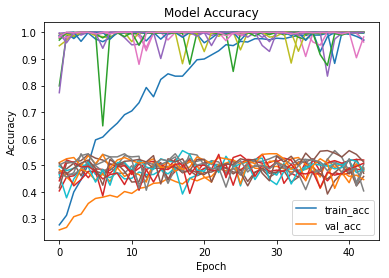

In [25]:
#目前这个最好
#只有FC有dropout
# [conv-relu]*2 -> 2*2 max-pooling -> [conv-relu]*3 -> 2*2 max_pooling -> (affine-relu)*2 -> affine -> softmax
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()  # initial the model
        self.conv1 = nn.Conv1d(22,40,kernel_size = 2,stride = 2) 
        self.bn1 = nn.BatchNorm1d(40)
        self.conv2 = nn.Conv1d(40,60,kernel_size = 3,stride = 1) 
        self.bn2 = nn.BatchNorm1d(60) 
        self.pool1 = nn.MaxPool1d(2,2) 
        
        self.conv3 = nn.Conv1d(60,80,kernel_size = 3, stride = 1) 
        self.bn3 = nn.BatchNorm1d(80)
        self.conv4 = nn.Conv1d(80,100,kernel_size = 3, stride = 1) 
        self.bn4 = nn.BatchNorm1d(100)
        self.conv5 = nn.Conv1d(100,120,kernel_size = 3, stride = 2) #120*122
        self.bn5 = nn.BatchNorm1d(120)
        self.pool2 = nn.MaxPool1d(2,2) #120*61
        
        self.fc1 = nn.Linear(120*61, 300) # input dim , output dim
        self.bn6 = nn.BatchNorm1d(300)
        self.drop1 = nn.Dropout(0.8)
        self.fc2 = nn.Linear(300,40)  
        self.bn7 = nn.BatchNorm1d(40)
        self.drop2 = nn.Dropout(0.8)
        self.fc3 = nn.Linear(40,4)
 
    def forward(self,x):
        x = self.pool1(F.relu(self.bn2(self.conv2(F.relu(self.bn1(self.conv1(x)))))))
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn4(self.conv4(x)))
        x = self.pool2(F.relu(self.bn5(self.conv5(x))))
        x = x.view(-1,120*61)
        
        x = self.drop1(F.relu(self.bn6(self.fc1(x))))
        x = self.drop2(F.relu(self.bn7(self.fc2(x))))
        x = self.fc3(x)
        return x
net = Net()
print(net)
criterion = nn.CrossEntropyLoss()
#optimizer = torch.optim.Adam(net.parameters(),lr = 0.01)

for i in range(1,15):
    print('lr is ', 1e-4 * i, '------------------------------------------')
    optimizer = torch.optim.RMSprop(net.parameters(),lr = 1e-4 * i)
    val_acc_history = []
    train_acc_history = []
    for epoch in range(43):
        for i , data in enumerate(train_loader, 0):
            inputs, labels = data

            net.train()

            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _,predicted = torch.max(outputs.data, 1)
            train_acc = (predicted == labels).sum().item() / len(labels)

            if i % 2 == 1:
                net.eval()
                val_correct, val_total = 0, 0 
                for val_data in val_loader:
                    val_images, val_labels = val_data
                    val_outputs = net(val_images)
                    _, val_predicted = torch.max(val_outputs.data, 1)
                    val_total += val_labels.size(0)
                    val_correct += (val_predicted == val_labels).sum().item()
                val_acc = val_correct / val_total
                print('Epoch {} | Iter{} | Loss{:.4f} | TrainAcc{:.4f} | val acc {:.4f}'.format(
                    epoch, i , loss, train_acc, val_acc))
                #writer.add_scalar('Train/Loss',loss,epoch*len(trainloader) + i)
                #writer.add_scalar('Train/ACC',train_acc,epoch*len(trainloader) + i)
                #writer.add_scalar('VAL/ACC',val_acc,epoch*len(trainloader) + i)
        net.eval()
        train_correct, train_total = 0, 0
        for train_data in train_loader:
            train_inputs, train_labels = train_data
            train_outputs = net(train_inputs)
            _, train_predicted = torch.max(train_outputs.data, 1)
            train_total += train_labels.size(0)
            train_correct += (train_predicted == train_labels).sum().item()
        train_acc = train_correct / train_total
        train_acc_history.append(train_acc)
        val_correct, val_total = 0, 0
        for val_data in val_loader:
            val_images, val_labels = val_data
            val_outputs = net(val_images)
            _, val_predicted = torch.max(val_outputs.data, 1)
            val_total += val_labels.size(0)
            val_correct += (val_predicted == val_labels).sum().item()
        val_acc = val_correct / val_total
        val_acc_history.append(val_acc)
        #if val_acc == max(val_acc_history):
        #    net_best = Net()
        #    net_best.load_state_dict(net.state_dict())

    test_correct, test_total = 0, 0
    for test_data in test_loader:
        test_images, test_labels = test_data
        test_outputs = net(test_images)
        #test_outputs = net_best(test_images)
        _, test_predicted = torch.max(test_outputs.data, 1)
        test_total += test_labels.size(0)
        test_correct += (test_predicted == test_labels).sum().item()
    test_acc = test_correct / test_total
    print('Test accuracy is: ',test_acc)
    plt.plot(train_acc_history,)
    plt.plot(val_acc_history)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy')
    plt.legend(['train_acc','val_acc'])
